# Project MSI

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner

In [45]:
## b: default parameter
def set_default_parameter():
    p_common = 0.8
    sigma_v = 0.6
    sigma_a = 3.1
    sigma_p = 15
    mu_p = 0.0
    return p_common, sigma_v, sigma_a, sigma_p, mu_p


p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()

In [46]:
def p_given_c1(x_v, x_a, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(x_v,x_a|C=1) 
    Eq. 4
    """
    denominator = sigma_v ** 2 * sigma_a ** 2 + sigma_v ** 2 * sigma_p ** 2 + sigma_a ** 2 * sigma_p ** 2
    exponent = -0.5 * (
            (x_v - x_a) ** 2 * sigma_p ** 2 + (x_v - mu_p) ** 2 * sigma_a ** 2 + (x_a - mu_p) ** 2 * sigma_v ** 2
    ) / denominator
    return 1 / (2 * np.pi * np.sqrt(denominator)) * np.exp(exponent)


def p_given_c2(x_v, x_a, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(x_v,x_a|C=2) 
    Eq. 6
    """
    denominator_v = sigma_v ** 2 + sigma_p ** 2
    denominator_a = sigma_a ** 2 + sigma_p ** 2
    exponent = -0.5 * (
            (x_v - mu_p) ** 2 / denominator_v + (x_a - mu_p) ** 2 / denominator_a
    )
    return 1 / (2 * np.pi * np.sqrt(denominator_v * denominator_a)) * np.exp(exponent)


def P_C1_given_perception(x_v, x_a, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(C=1|x_v,x_a) = [p(x_v,x_a|C=1)*p_common]/[p(x_v,x_a|C=1)*p_common + p(x_v,x_a|C=2)*(1-p_common)]
    Eq. 2
    """
    p_given_c1_value = p_given_c1(x_v, x_a, sigma_v, sigma_a, sigma_p, mu_p)
    p_given_c2_value = p_given_c2(x_v, x_a, sigma_v, sigma_a, sigma_p, mu_p)
    return p_given_c1_value * p_common / (
            p_given_c1_value * p_common + p_given_c2_value * (1 - p_common)
    )


### c: Plot probability of a common cause given noisy stimuli (default)

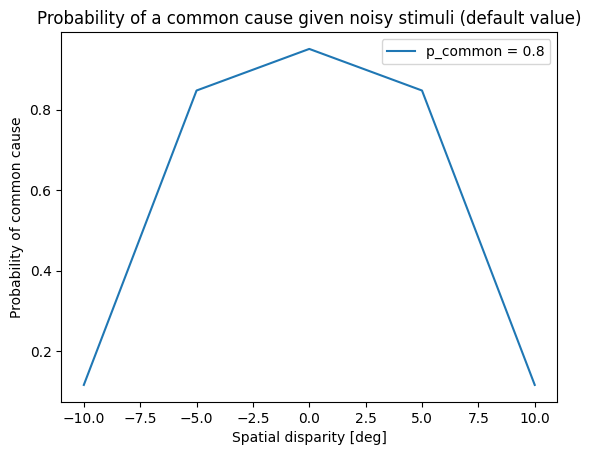

In [47]:
x_v_values = np.arange(-10, 10 + 1e-5, 5)  #locations extended from 10° to the left of the fixation point to 
#10° to the right of the fixation point at 5° intervals
x_a_values = np.zeros(5)
x_diff = x_v_values - x_a_values

P_C1_changeP = [P_C1_given_perception(x_v_values, x_a_values)]

for p in P_C1_changeP:
    plt.plot(x_diff, p, label=f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that with default values the probability of common cause assumed by participant is less likely then not assuming it (less 50%) for more than +/-7.5°.

### probability of a common cause given noisy stimuli vary P_common
That means we change the prior beliefe, i.e. the prior uncertainty (increase with higher sigma).


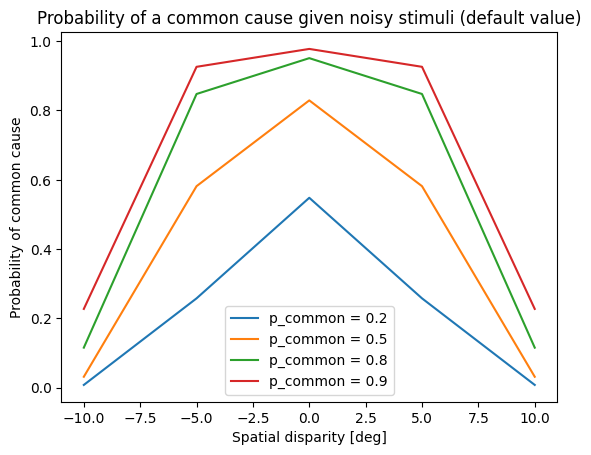

In [48]:
P_common_difference = [0.2, 0.5, 0.8, 0.9]
P_common_dict = {}
for p_common in P_common_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, p_common=p_common)
    P_common_dict[p_common] = P_C1_values

for p_common, p_values in P_common_dict.items():
    plt.plot(x_diff, p_values, label=f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_v
That means we make visual data different noisy (higher sigma = more noisy)


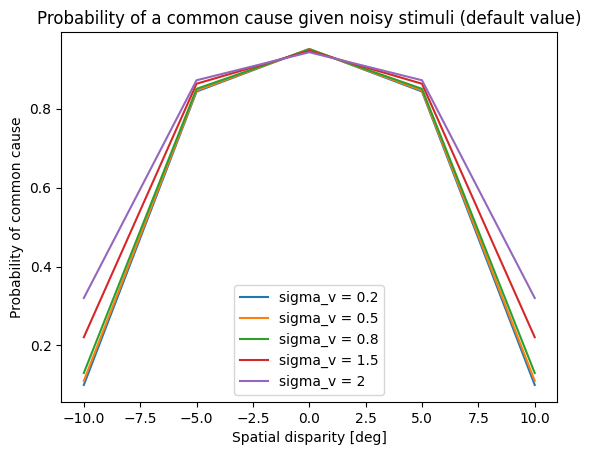

In [49]:
sigma_v_difference = [0.2, 0.5, 0.8, 1.5, 2]
sigma_v_dict = {}
for sigma_v in sigma_v_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_v=sigma_v)
    sigma_v_dict[sigma_v] = P_C1_values

for sigma_v, p_values in sigma_v_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_v = {sigma_v}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_a
That means we make the Auditory signal change in noise (higher sigma = more noisy).


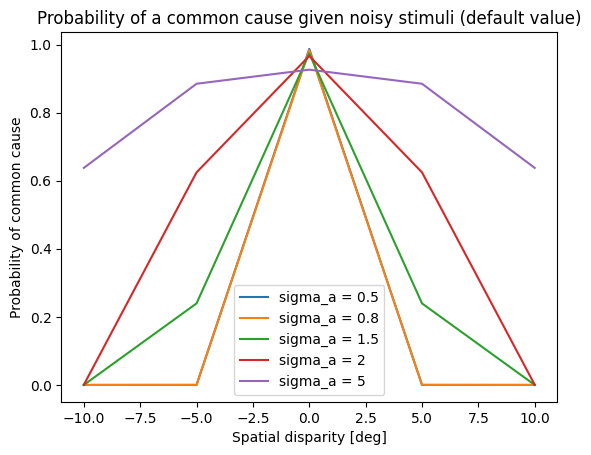

In [50]:
sigma_a_difference = [0.5, 0.8, 1.5, 2, 2, 5, 5]
sigma_a_dict = {}
for sigma_a in sigma_a_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_a=sigma_a)
    sigma_a_dict[sigma_a] = P_C1_values

for sigma_a, p_values in sigma_a_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_a = {sigma_a}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

Need more noise in audio to see a difference. 
But again higher noise increase probability of thinking its a common cause.

### probability of a common cause given noisy stimuli vary sigma_p

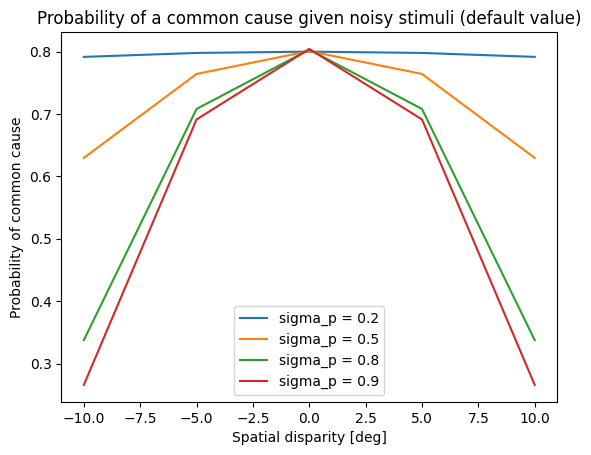

In [51]:
sigma_p_difference = [0.2, 0.5, 0.8, 0.9]
sigma_p_dict = {}
for sigma_p in sigma_p_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_p=sigma_p)
    sigma_p_dict[sigma_p] = P_C1_values

for sigma_p, p_values in sigma_p_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_p = {sigma_p}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that the probability of common cause is higher with higher sigma_p, i.e. more noise in the prior belief.

### Part (d) — Plot estimated stimulus positions ŝv and ŝa as a function of xv (assuming xa = 0)


In [52]:
# Part (d) — Plot estimated stimulus positions ŝv and ŝa as a function of xv (assuming xa = 0)

# Default parameters
p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()


def estimate_sv_sa(xv, xa, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15.0, mu_p=0.0):
    """
    Estimate the visual and auditory stimulus positions based on noisy observations.
    Args:
        xv: Noisy visual observation.
        xa: Noisy auditory observation.
        p_common: Prior probability of common cause.
        sigma_v: Standard deviation of visual noise.
        sigma_a: Standard deviation of auditory noise.
        sigma_p: Standard deviation of spatial prior.
        mu_p: Mean of spatial prior.
    Returns:
        sv_hat: Estimated visual stimulus position.
        sa_hat: Estimated auditory stimulus position.
    """

    # Compute p(C=1|xv, xa) (Eq. 2)
    p_c1 = P_C1_given_perception(xv, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)

    # Compute sv_c2 and sa_c2 (Eq. 11)
    sv_c2 = (xv / sigma_v ** 2 + mu_p / sigma_p ** 2) / (1 / sigma_v ** 2 + 1 / sigma_p ** 2)
    sa_c2 = (xa / sigma_a ** 2 + mu_p / sigma_p ** 2) / (1 / sigma_a ** 2 + 1 / sigma_p ** 2)

    # Compute s_common (Eq. 12)
    s_common = (xv / sigma_v ** 2 + xa / sigma_a ** 2 + mu_p / sigma_p ** 2) / \
               (1 / sigma_v ** 2 + 1 / sigma_a ** 2 + 1 / sigma_p ** 2)

    # Compute sv_hat and sa_hat (Eq. 9 and Eq. 10)
    sv_hat = p_c1 * s_common + (1 - p_c1) * sv_c2
    sa_hat = p_c1 * s_common + (1 - p_c1) * sa_c2

    return sv_hat, sa_hat


def plot_estimated_positions(xv_vals, xa=0.0, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15.0, mu_p=0.0, ax=None):
    sv_hats, sa_hats = estimate_sv_sa(xv_vals, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)

    if ax is None:
        ax = plt.gca()

    ax.plot(xv_vals, np.array(sv_hats).flatten(), label="Estimated $\hat{s}_v$")
    ax.plot(xv_vals, np.array(sa_hats).flatten(), label="Estimated $\hat{s}_a$")
    ax.plot(xv_vals, xv_vals, 'k--', label="Identity line")
    ax.set_xlabel("$x_v$ (Visual observation)")
    ax.set_ylabel("Estimated position")
    ax.set_title(
        fr"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$"
        f"\n (with $x_a = 0$, $p_{{common}} = {p_common}$, "
        f"$\sigma_v = {sigma_v}$, $\sigma_a = {sigma_a}$, $\sigma_p = {sigma_p}$)"
    )
    ax.legend()
    ax.grid(True)


<>:47: SyntaxWarning: invalid escape sequence '\h'
<>:48: SyntaxWarning: invalid escape sequence '\h'
<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\h'
<>:48: SyntaxWarning: invalid escape sequence '\h'
<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\953231612.py:47: SyntaxWarning: invalid escape sequence '\h'
  ax.plot(xv_vals, np.array(sv_hats).flatten(), label="Estimated $\hat{s}_v$")
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\953231612.py:48: SyntaxWarning: invalid escape sequence '\h'
  ax.plot(xv_vals, np.array(sa_hats).flatten(), label="Estimated $\hat{s}_a$")
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\953231612.py:55: SyntaxWarning: invalid escape s

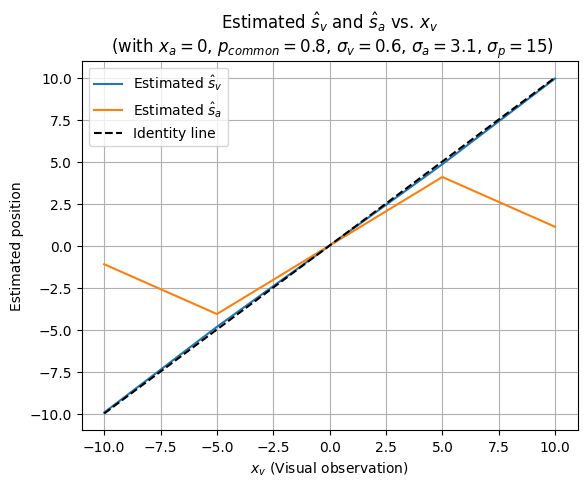

In [53]:
#xv_vals = np.linspace(-10, 10, 200)

plot_estimated_positions(x_v_values, x_a_values, p_common=p_common, sigma_v=sigma_v, sigma_a=sigma_a, sigma_p=sigma_p,
                         mu_p=mu_p)
plt.show()

$x_v$ is the observed (noisy) visual cue. 
$\hat{{s}}_v$ is estimated true visual stimulus position (blue)
$\hat{{s}}_a$ is estimated true auditory stimulus position (orange)

From the plot we observed when $x_v$ is close to zero, under the assumption $x_a$ is 0, the two stimulus integrate to a common cause, i.e. the estimated positions are close to each other. 
When $x_v$ is far away from zero the estimated positions diverge, i.e. the visual and auditory stimulus are not integrated. 
At large disparities, the estimates diverge — reflecting segregation due to low posterior for a common cause (The posterior p(C=1∣$x_v$,$x_a$) drops, and p(C=2∣$x_v$​,$x_a$​) increases.).

The identity line in the plot, shows the estimated position if the system relied purely on the visual input. 
So $\hat{{s}}$ = $x_v$. If the estimated visual position s^vs^v​ follows the identity line, it means the estimate is fully determined by the visual cue — i.e., no integration is happening.

### Varying $p_{{common}}$, $\sigma_v$, $\sigma_a$, $\sigma_p$ (with few points like experiment)

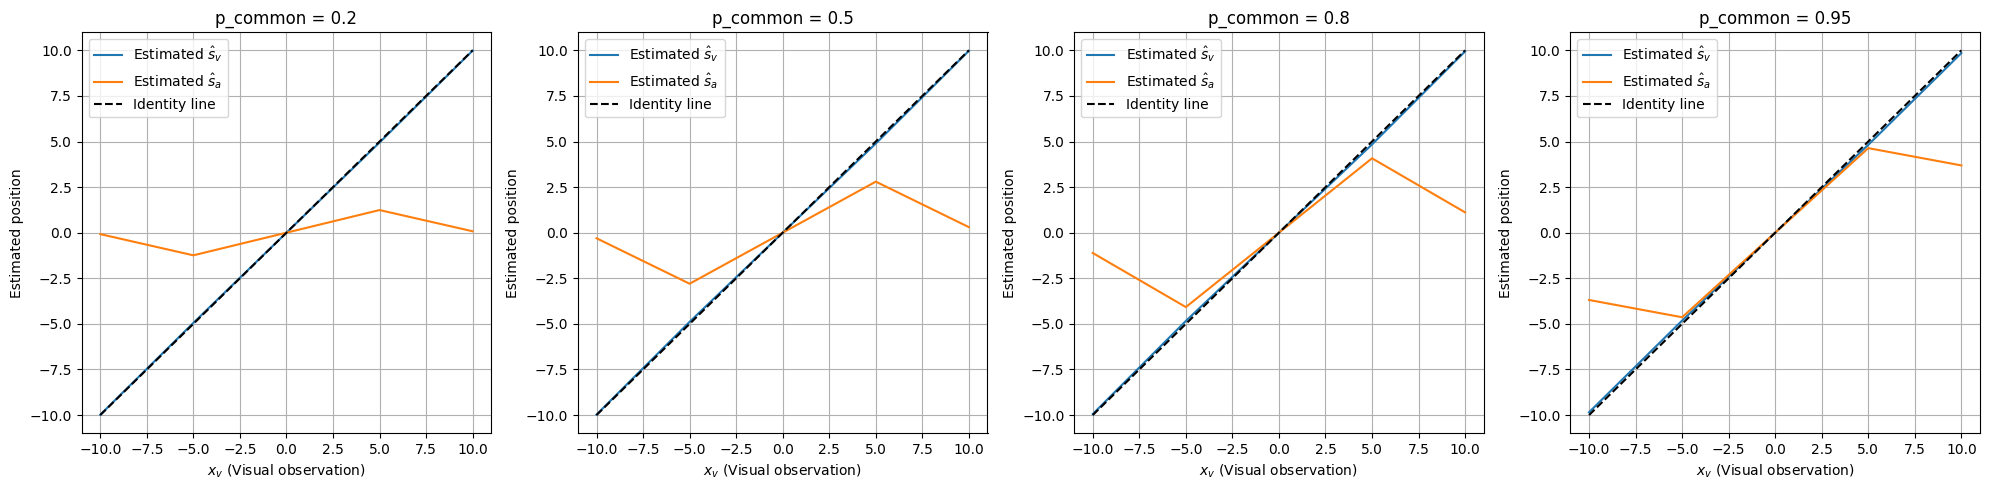

In [54]:
#varying p_common
p_common_values = [0.2, 0.5, 0.8, 0.95]

fig, axes = plt.subplots(1, len(p_common_values), figsize=(20, 5))  # 1 row, 4 columns

for ax, p_common in zip(axes, p_common_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        p_common=p_common,
        ax=ax
    )
    ax.set_title(f'p_common = {p_common}')

plt.tight_layout()
plt.show()

Varying $p_{{common}}$ means changing the belief in common cause. if we increase this beliefe, the estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ get closer together, indicating that even with higher spatial disparity ($x_v$ more far away from zero and so from $x_a$) the beliefe in common cause is high and lead to close estimation of the two stimuli. So with higher prior belief in a common cause, the range in which visual stimulus affects auditory stimulus estimation increase. 

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\117757765.py:12: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'$\sigma_a$ = {sigma_a}')


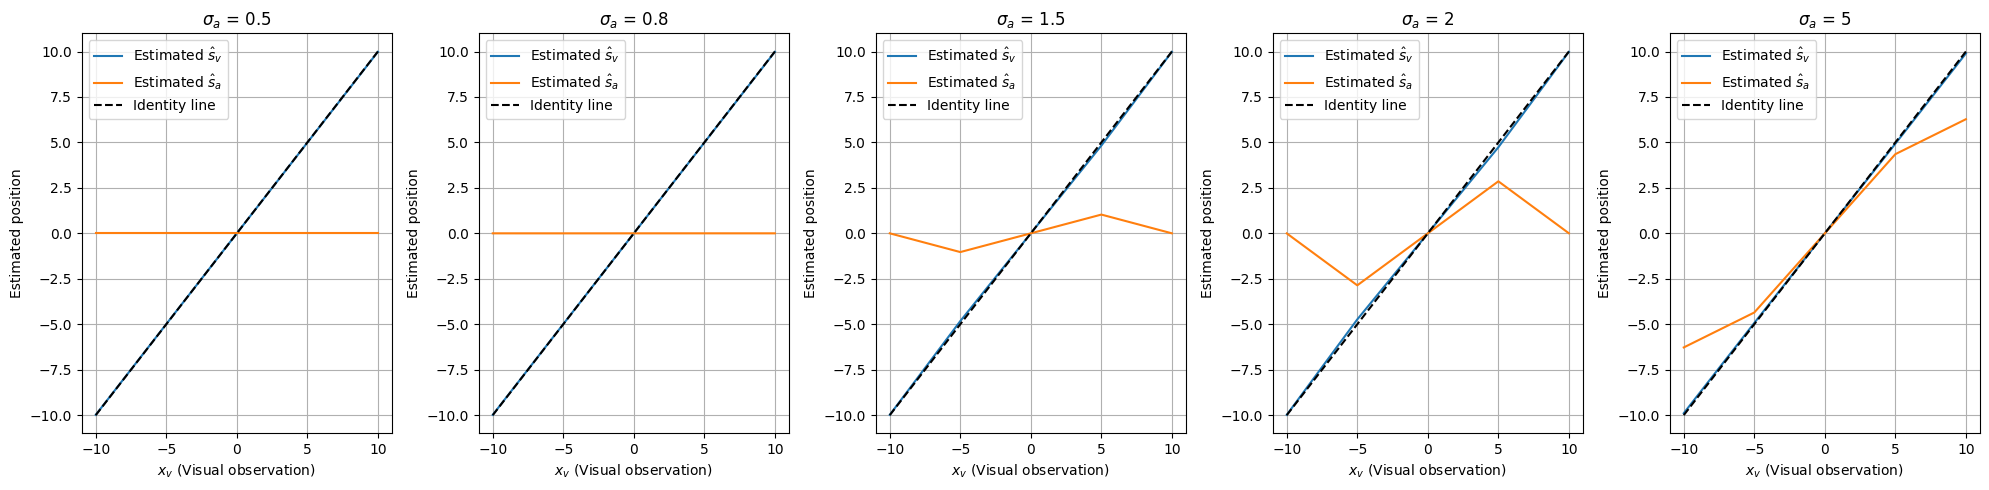

In [55]:
# Varying sigma_a
sigma_a_values = [0.5, 0.8, 1.5, 2, 5]

fig, axes = plt.subplots(1, len(sigma_a_values), figsize=(20, 5))

for ax, sigma_a in zip(axes, sigma_a_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_a=sigma_a,
        ax=ax
    )
    ax.set_title(f'$\sigma_a$ = {sigma_a}')

plt.tight_layout()
plt.show()

Varying $\sigma_a$ changes the nosie of auditory data. 
Higher noise, pushes away the estimated $\hat{{s}}_a$ from the horizontal line zero (caused by $x_a$ = 0). 
The noiser the auditory signal get, the higher the probability of belief in common cause (with $\sigma_a$ = 5 high overlap from $\hat{{s}}_a$ and $\hat{{s}}_v$). 

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\2858299497.py:12: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'$\sigma_v$ = {sigma_v}')


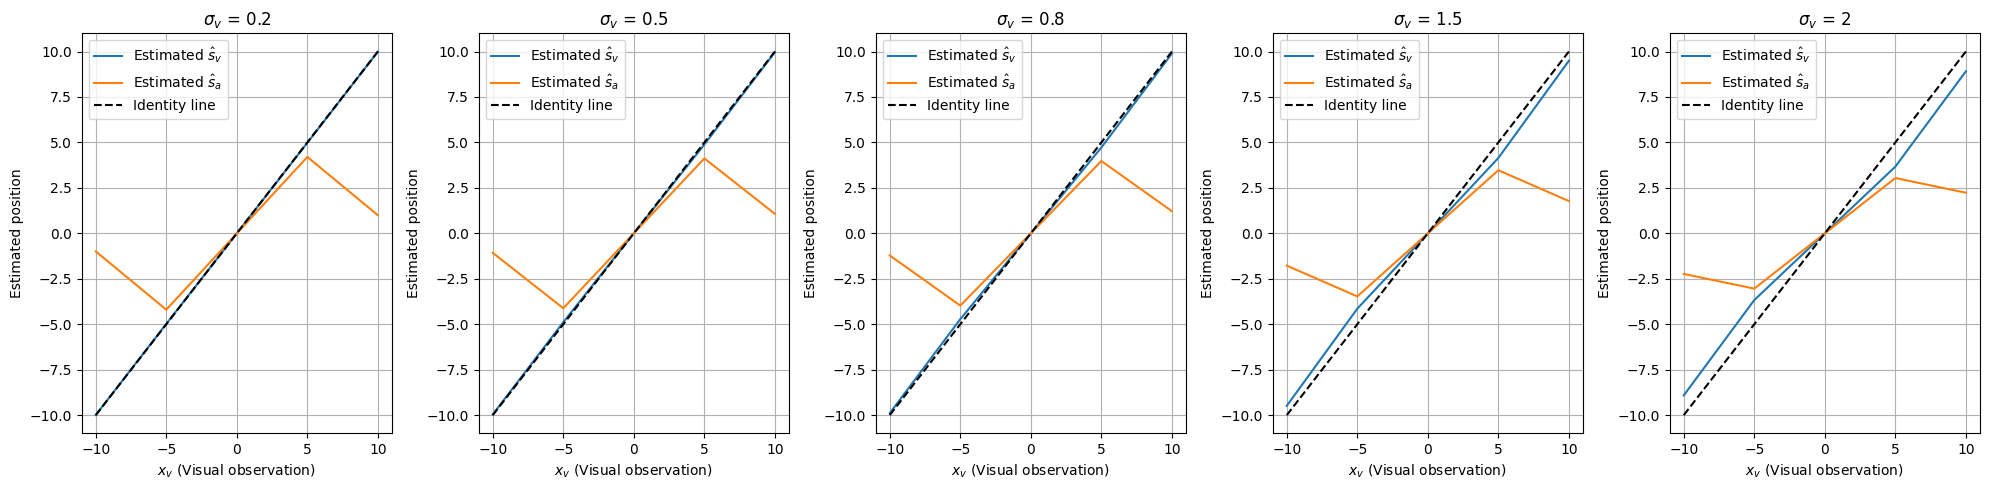

In [56]:
# Varying sigma_v
sigma_v_values = [0.2, 0.5, 0.8, 1.5, 2]

fig, axes = plt.subplots(1, len(sigma_v_values), figsize=(20, 5))

for ax, sigma_v in zip(axes, sigma_v_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_v=sigma_v,
        ax=ax
    )
    ax.set_title(f'$\sigma_v$ = {sigma_v}')

plt.tight_layout()
plt.show()

Varying $\sigma_v$ changes the nosie of visual data. 
Higher noise, pushes away the estimated $\hat{{s}}_v$ from the identity line(caused by varying $x_v$ on x-axis). 
The noiser the visual signal get, the higher the probability of belief in common cause (with $\sigma_v$ = 2 high overlap from $\hat{{s}}_a$ and $\hat{{s}}_v$) and the more away the estimated visual signal get from identity line. 


<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\1265673195.py:11: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'$\sigma_p$ = {sigma_p}')


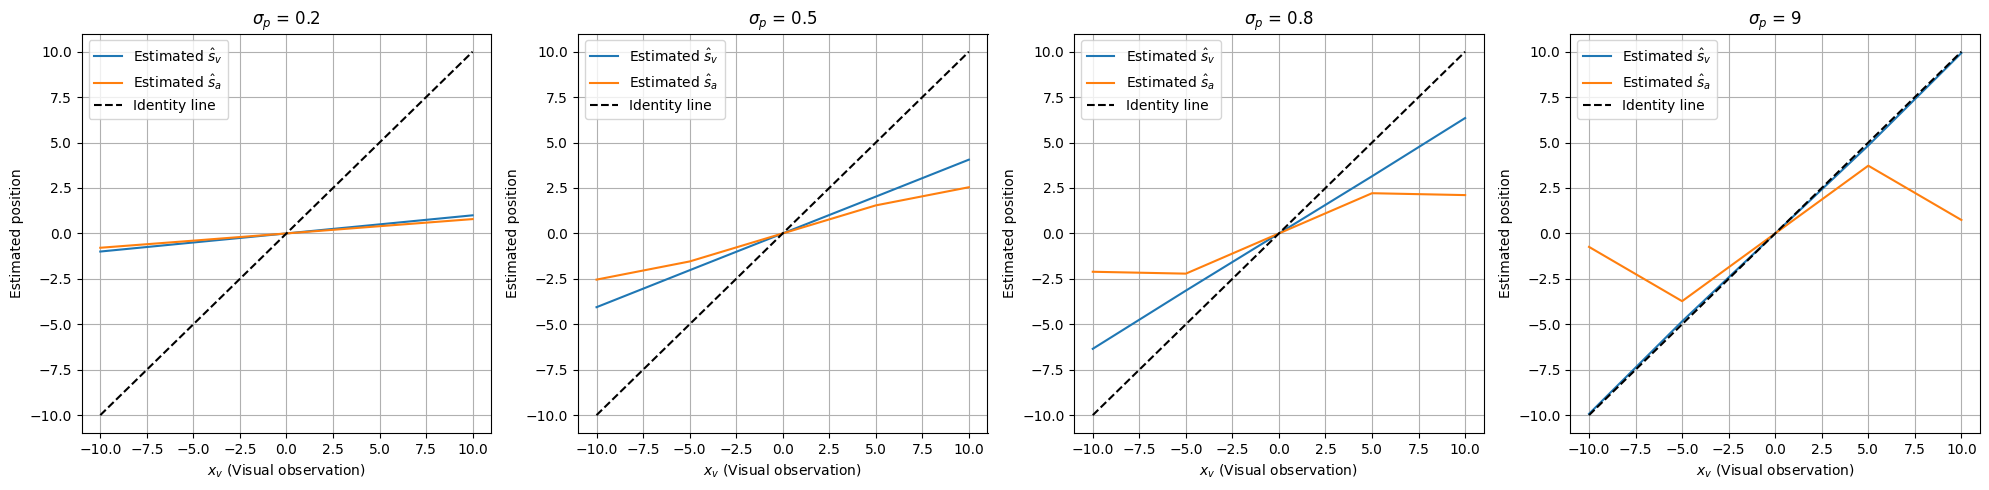

In [57]:
# Varying sigma_p
sigma_p_values = [0.2, 0.5, 0.8, 9]
fig, axes = plt.subplots(1, len(sigma_p_values), figsize=(20, 5))

for ax, sigma_p in zip(axes, sigma_p_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_p=sigma_p,
        ax=ax
    )
    ax.set_title(f'$\sigma_p$ = {sigma_p}')

plt.tight_layout()
plt.show()

Varying $\sigma_p$ changes the prior uncertainty. 
Increasing $\sigma_p$ brings the estimated values closer to the values we observe before and first more far away from each other, but then both closer to identity line (as $\sigma_v$ is smaller, means visual stimulus is less noisy and dominate). 
While with a low prior uncertainty, $\hat{{s}}_a$ and $\hat{{s}}_v$ are close to each other (so high probabilty of common cause) and far away from identity line.
With $\sigma_p$ close to zero, there is a strong bias towards expecting the stimuli straight ahead, and therefore, estimated them at center (horizontal zero) regardless  of the visual observation. 

### Varying $p_{{common}}$, $\sigma_v$, $\sigma_a$, $\sigma_p$ (more than the 5 measure points of experiment for smooth curves)

In [58]:
def plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="p_common", param_values=None, **kwargs):
    """
    Plot estimated stimulus positions ŝv and ŝa for varying parameter values in a single diagram.
    
    Args:
        xv_vals: Array of visual observation values.
        xa: Fixed auditory observation value.
        param_name: Name of the parameter to vary (e.g., "p_common").
        param_values: List of values for the parameter to vary.
        kwargs: Other fixed parameters.
    """

    if param_values is None:
        default_params = {
            "p_common": 0.8,
            "sigma_v": 0.6,
            "sigma_a": 3.1,
            "sigma_p": 15.0,
            "mu_p": 0.0
        }
        param_values = [kwargs.get(param_name, default_params.get(param_name, 0.0))]

    plt.figure(figsize=(10, 6))

    for param_value in param_values:
        kwargs[param_name] = param_value
        sv_hats, sa_hats = [], []
        for xv in xv_vals:
            sv_hat, sa_hat = estimate_sv_sa(xv, xa, **kwargs)
            sv_hats.append(sv_hat)
            sa_hats.append(sa_hat)

        plt.plot(xv_vals, sv_hats, label=f"$\hat{{s}}_v$ ({param_name}={param_value})")
        plt.plot(xv_vals, sa_hats, label=f"$\hat{{s}}_a$ ({param_name}={param_value})")

    plt.plot(xv_vals, xv_vals, 'k--', label="Identity line")
    plt.xlabel("xv (Visual observation)")
    plt.ylabel("Estimated position")
    plt.title(f"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$ (varying {param_name})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\179725469.py:33: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(xv_vals, sv_hats, label=f"$\hat{{s}}_v$ ({param_name}={param_value})")
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\179725469.py:34: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(xv_vals, sa_hats, label=f"$\hat{{s}}_a$ ({param_name}={param_value})")
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\179725469.py:39: SyntaxWarning: invalid escape sequence '\h'
  plt.title(f"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$ (varying {param_n

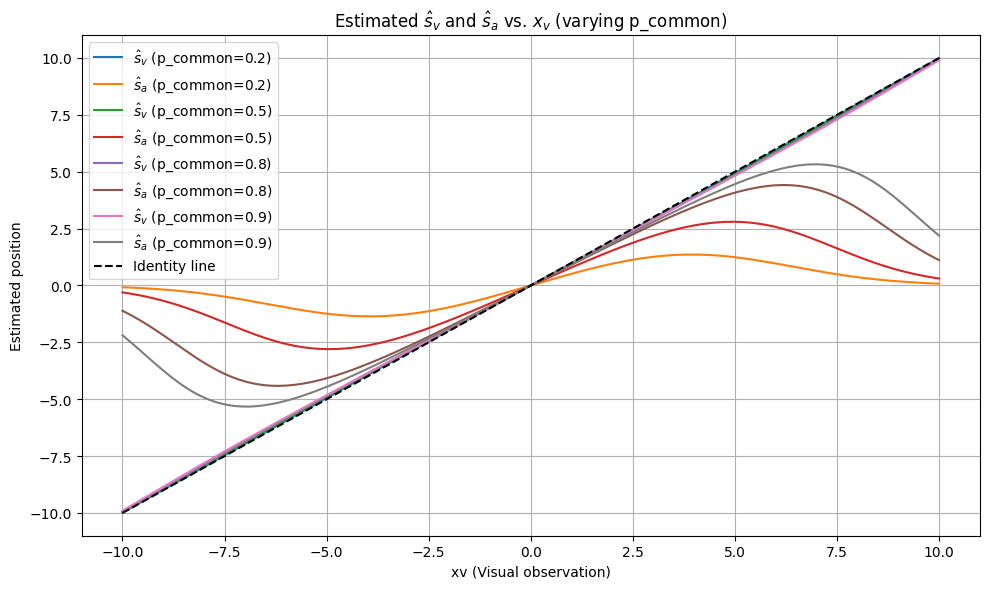

In [59]:
xv_vals = np.linspace(-10, 10, 200)
p_common_values = [0.2, 0.5, 0.8, 0.9]

plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="p_common", param_values=p_common_values, sigma_v=0.6,
                                  sigma_a=3.1, sigma_p=15.0, mu_p=0.0)

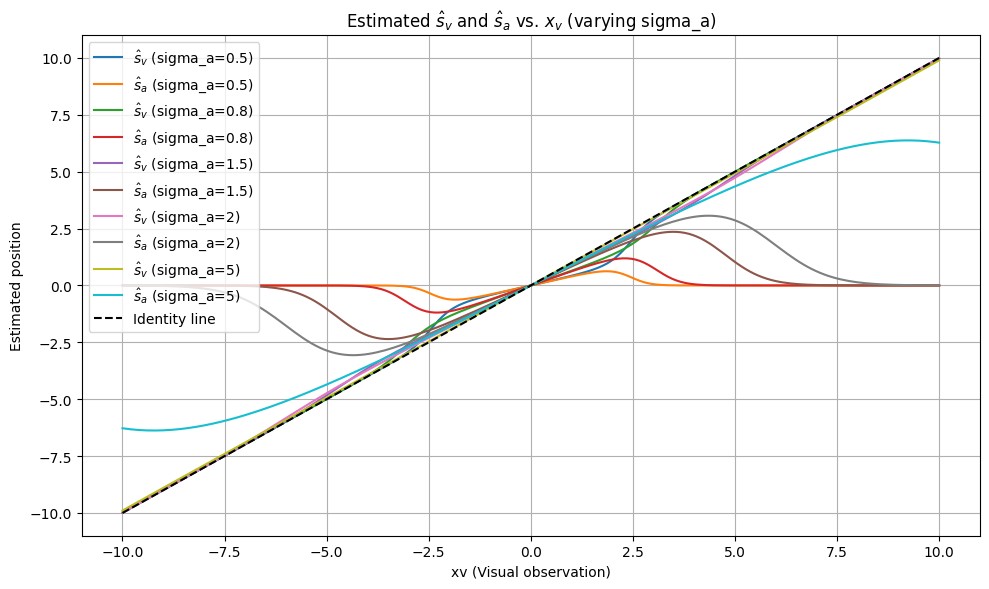

In [60]:
xv_vals = np.linspace(-10, 10, 200)

# Varying sigma_a
sigma_a_values = [0.5, 0.8, 1.5, 2, 5]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_a", param_values=sigma_a_values, sigma_v=0.6,
                                  sigma_p=15.0, mu_p=0.0)


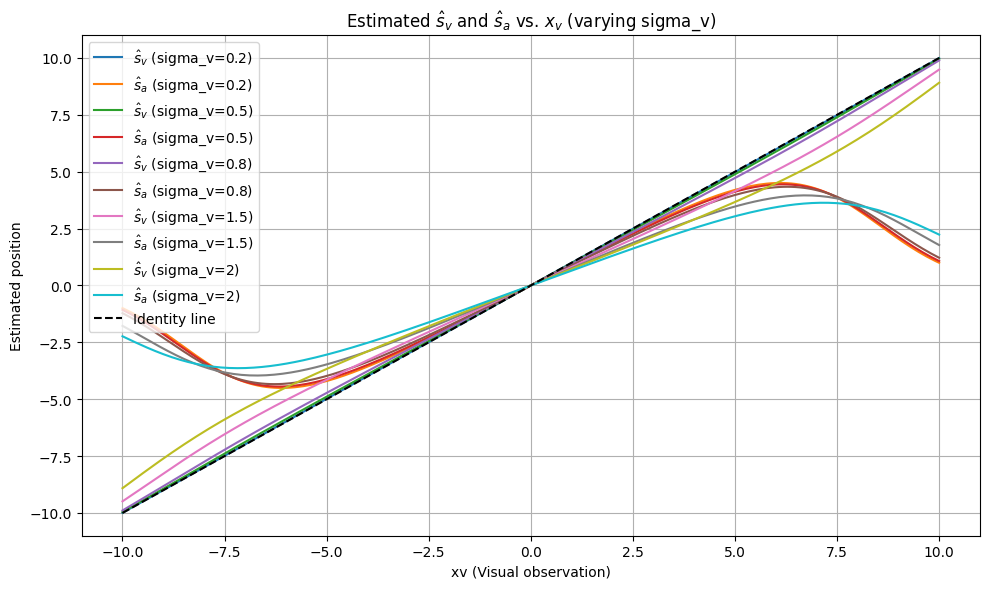

In [61]:
# Varying sigma_v
sigma_v_values = [0.2, 0.5, 0.8, 1.5, 2]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_v", param_values=sigma_v_values, sigma_a=3.1,
                                  sigma_p=15.0, mu_p=0.0)


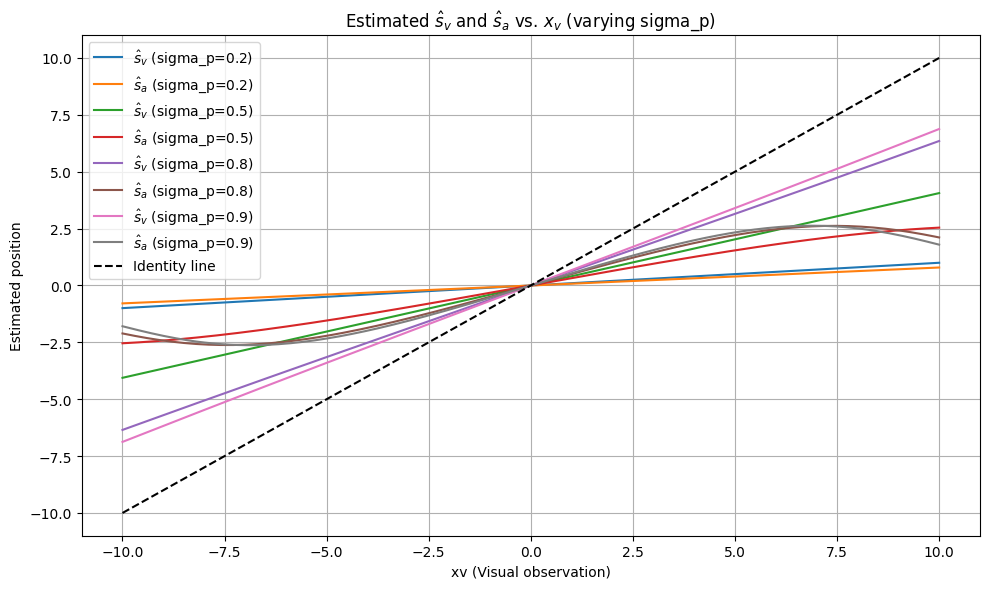

In [62]:
# Varying sigma_p
sigma_p_values = [0.2, 0.5, 0.8, 0.9]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_p", param_values=sigma_p_values, sigma_v=0.6,
                                  sigma_a=3.1, mu_p=0.0)

### Part(e)  — Evaluate the integral in Equation 13 Monte Carlo Sampling analytically

Consider the integral in Equation 13, how might you evaluate it?


##### What kind of function is  $p(\hat{{s}}_v|x_v,x_a)$? How does it affect the analytical evaluation?
It represents the conditional distribution of the estimated visual position  $\hat{{s}}_v$​ given noisy sensory observations $x_v$ (visual) and $x_a$​ (auditory).
Due to noise and nonlinearities, analytic evaluation is hard. So we use a Monte-Carlo numerical approximation.

In [63]:
def mont_carlo_estimation(target_sv_hat, sv, sa, sigma_v, sigma_a, delta=0.1, n_samples=5000):
    xv_samples = np.random.normal(sv, sigma_v, size=n_samples)
    xa_samples = np.random.normal(sa, sigma_a, size=n_samples)
    sv_estimates = np.array([estimate_sv_sa(xv, xa)[0] for xv, xa in zip(xv_samples, xa_samples)])
    prob_density = np.mean(np.abs(sv_estimates - target_sv_hat) < delta)
    return prob_density

In [64]:
def plot_monte_carlo_distribution(sv_true_values, sa_true_values, sigma_v=0.6, sigma_a=3.1, delta=0.1, n_samples=6000):
    """
    Plot the distribution of estimated visual locations given arrays of true stimulus locations.

    Args:
        sv_true_values: Array of true visual stimulus locations.
        sa_true_values: Array of true auditory stimulus locations.
        sigma_v: Standard deviation of visual noise.
        sigma_a: Standard deviation of auditory noise.
        delta: Threshold for probability density estimation.
        n_samples: Number of Monte Carlo samples.
    """
    if len(sv_true_values) != len(sa_true_values):
        raise ValueError("sv_true_values and sa_true_values must have the same length.")

    plt.figure(figsize=(10, 6))

    for sv_true, sa_true in zip(sv_true_values, sa_true_values):
        sv_hat_range = np.linspace(-5, 5, 100)
        distribution = [mont_carlo_estimation(sv_hat, sv_true, sa_true, sigma_v, sigma_a, delta, n_samples)
                        for sv_hat in sv_hat_range]

        plt.plot(sv_hat_range, distribution, label=f'$s_v$={sv_true}, $s_a$={sa_true}')

    plt.xlabel('Estimated visual location ($\hat{s}_v$)')
    plt.ylabel('Probability density of the estimate $p(\hat{s}_v)$')
    plt.title('Numerical evaluation of Monte Carlo distribution')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\3934203337.py:25: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated visual location ($\hat{s}_v$)')
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\3934203337.py:26: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Probability density of the estimate $p(\hat{s}_v)$')


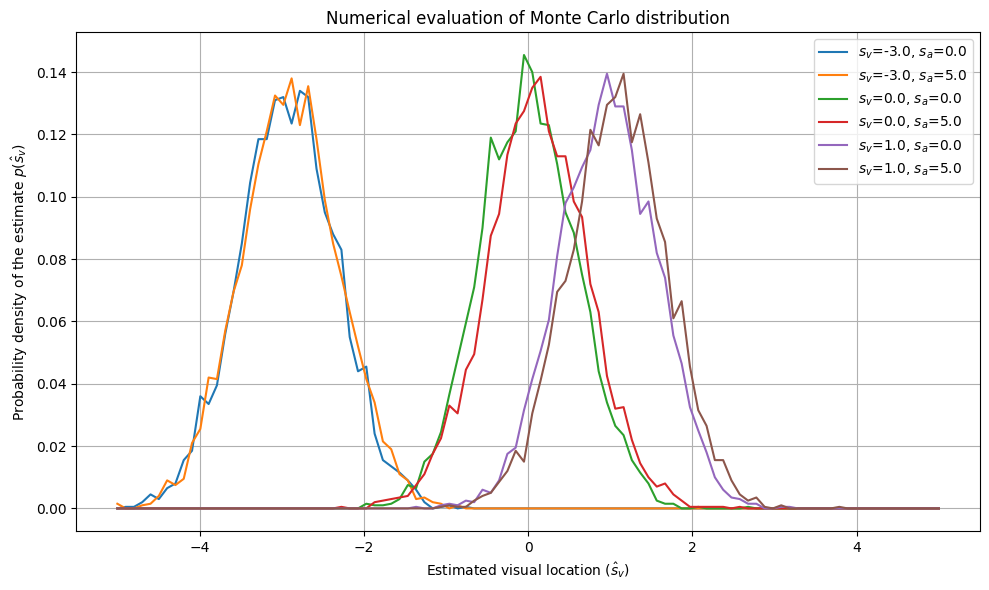

In [65]:
sv_true_values = [-3.0, -3.0, 0.0, 0.0, 1.0, 1.0]
sa_true_values = [0.0, 5.0, 0.0, 5.0, 0.0, 5.0, ]

plot_monte_carlo_distribution(sv_true_values, sa_true_values, sigma_v=0.6, sigma_a=3.1, delta=0.1, n_samples=2000)

We see the following in the plot: 
* peaks in the curves indicate the most probable estimated values $\hat{s}_v$ while different $s_v$ shift these peaks horizontally, showing how the estimator is influenced by the true stimulus.
* if $s_v$ not equal $s_a$ (e.g. compare [0,0] and [0,5]) we see that $s_a$ shift away the peak a little bit from the true $s_v$. 
* distribution spreads out, indicating certainty and weaker integration

This reflects how the brain infers, whether cues come from a common cause or not, core to the causal inference framework.

#TODO REPO: We only really see a shift (caused by s_a is different to s_v) when comparing red/green and not for the other pairs even so its the same difference between s_v and s_a. Why?

### Part (f) — Evaluate the integral in Equation 13 using Monte Carlo sampling
The nature of $p(\hat{s}_v|x_v, x_a)$ also suggests a numerical method for obtaining estimates
of $p(\hat{s}_a|s_v, s_a)$ and $p(\hat{s}_v|s_v, s_a)$. 
Use that method to plot both as a function of $s_v$ assuming $s_a$ = 0 (use a heat-map for these plots).

In [66]:
p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()


def generate_sv_sa_heatmaps(sv_range=(-5, 5), sa=0.0, bins=50, delta=0.2, n_samples=1000):
    sv_vals = np.linspace(*sv_range, bins)
    shat_vals = np.linspace(*sv_range, bins)

    heatmap_sv = np.zeros((bins, bins))
    heatmap_sa = np.zeros((bins, bins))

    for i, sv in enumerate(sv_vals):
        xv_samples = np.random.normal(sv, sigma_v, size=n_samples)
        xa_samples = np.random.normal(sa, sigma_a, size=n_samples)
        estimates = [estimate_sv_sa(xv, xa) for xv, xa in zip(xv_samples, xa_samples)]
        shats_sv = np.array([e[0] for e in estimates])
        shats_sa = np.array([e[1] for e in estimates])
        for j, target_shat in enumerate(shat_vals):
            heatmap_sv[i, j] = np.mean(np.abs(shats_sv - target_shat) < delta)
            heatmap_sa[i, j] = np.mean(np.abs(shats_sa - target_shat) < delta)

    return sv_vals, shat_vals, heatmap_sv, heatmap_sa


<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\1166600946.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated visual location $\hat{s}_v$ ')
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\1166600946.py:22: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated auditory location $\hat{s}_a$')


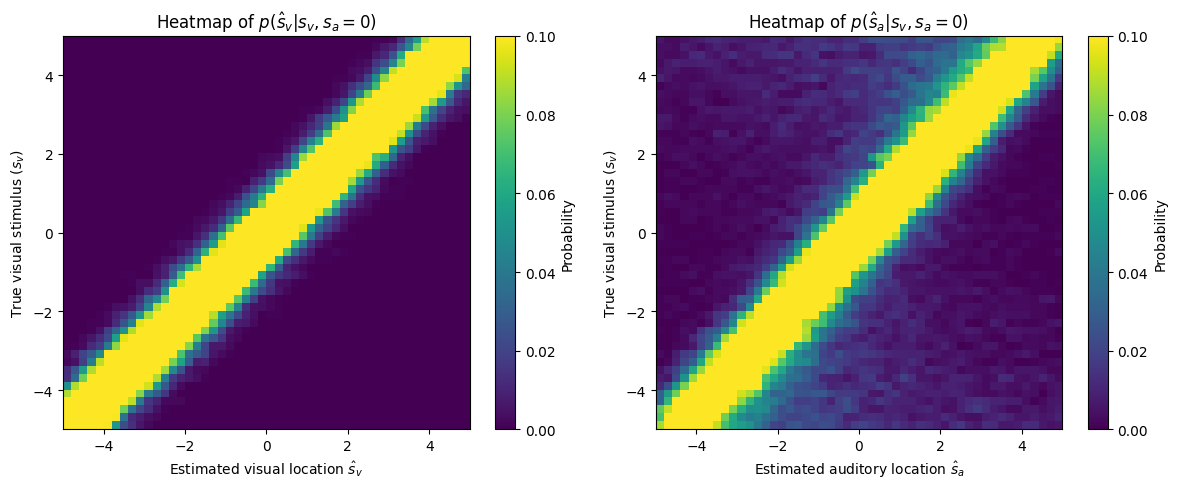

In [67]:
sv_vals, shat_vals, heatmap_sv, heatmap_sa = generate_sv_sa_heatmaps()

# Find the global min and max across both heatmaps
vmin = min(heatmap_sv.min(), heatmap_sa.min())
vmax = 0.1

# Plot the heatmap for p(ŝv | s_v, s_a)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(heatmap_sv, extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto', origin='lower',
           vmin=vmin, vmax=vmax)
plt.colorbar(label='Probability')
plt.xlabel('Estimated visual location $\hat{s}_v$ ')
plt.ylabel('True visual stimulus ($s_v$)')
plt.title('Heatmap of $p(\\hat{s}_v | s_v, s_a=0)$')

# Plot the heatmap for p(ŝa | s_v, s_a)
plt.subplot(1, 2, 2)
plt.imshow(heatmap_sa, extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto', origin='lower',
           vmin=vmin, vmax=vmax)
plt.colorbar(label='Probability')
plt.xlabel('Estimated auditory location $\hat{s}_a$')
plt.ylabel('True visual stimulus ($s_v$)')
plt.title('Heatmap of $p(\\hat{s}_a | s_v, s_a=0)$')

plt.tight_layout()
plt.show()



$P_{common}$=0.8

Left plot: <br>
The diagonal higher probability trend, indicates that with increase in $s_v$ also the estimated $\hat{s}_v$ increase. <br>
The blurring demonstraed the uncertainty. <br>
<br>
Right plot: <br>
Even so the true auditory stimulus is fixed at zero, the estimated auditory position  $\hat{s}_a$​ shifts with $s_v$, means the visual signal biases the auditory estimate​. This implies that the visual input influences the auditory estimate. This make sense as with $p_common$ = 0.8 we have a high prior belief of common cause and so an influence between the signals.<br>
Nevertheless we see more blurry results for estimated auditory signal, showing that we have more uncertainty for this data. ($\sigma_a$=3.1, $\sigma_v$=0.6)

TODO: True value of visual and auditory and look for p_common in heatmap.

<>:44: SyntaxWarning: invalid escape sequence '\h'
<>:53: SyntaxWarning: invalid escape sequence '\h'
<>:44: SyntaxWarning: invalid escape sequence '\h'
<>:53: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\264998905.py:44: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated visual location $\hat{s}_v$')
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\264998905.py:53: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated auditory location $\hat{s}_a$')


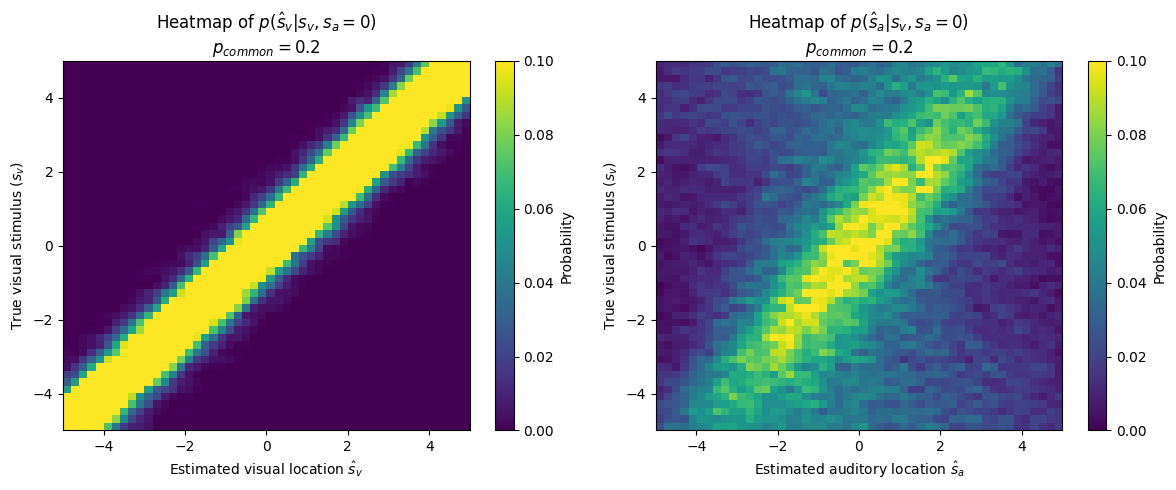

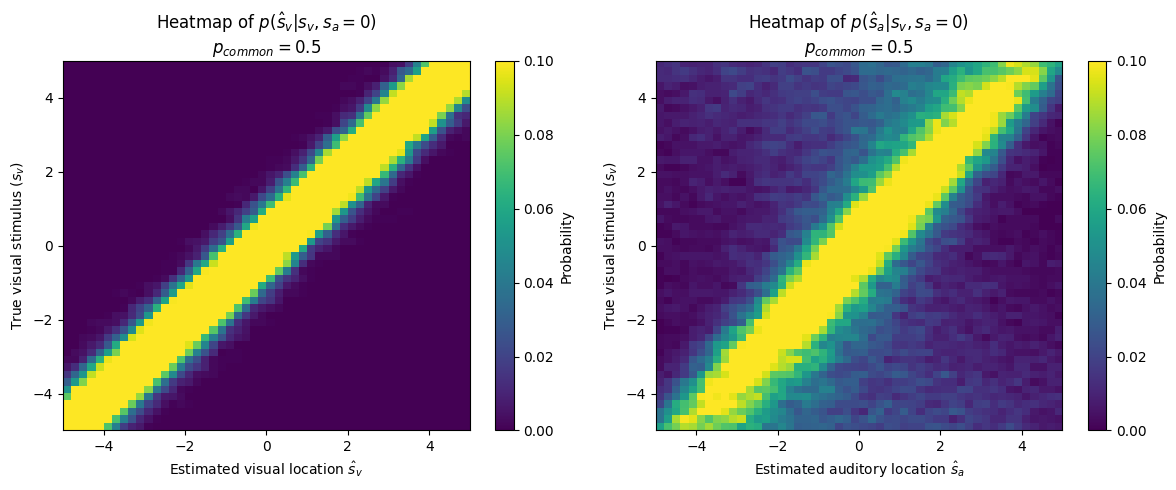

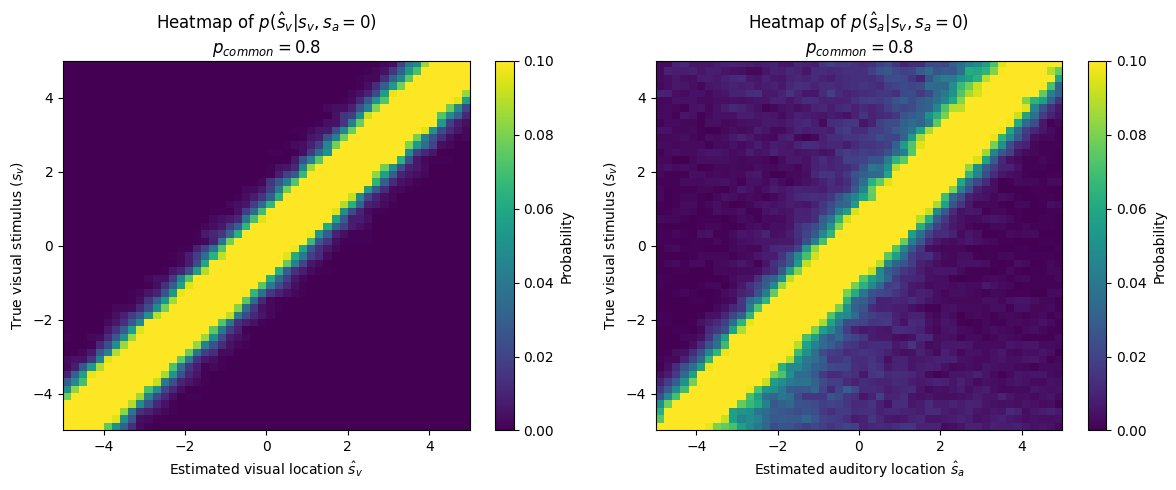

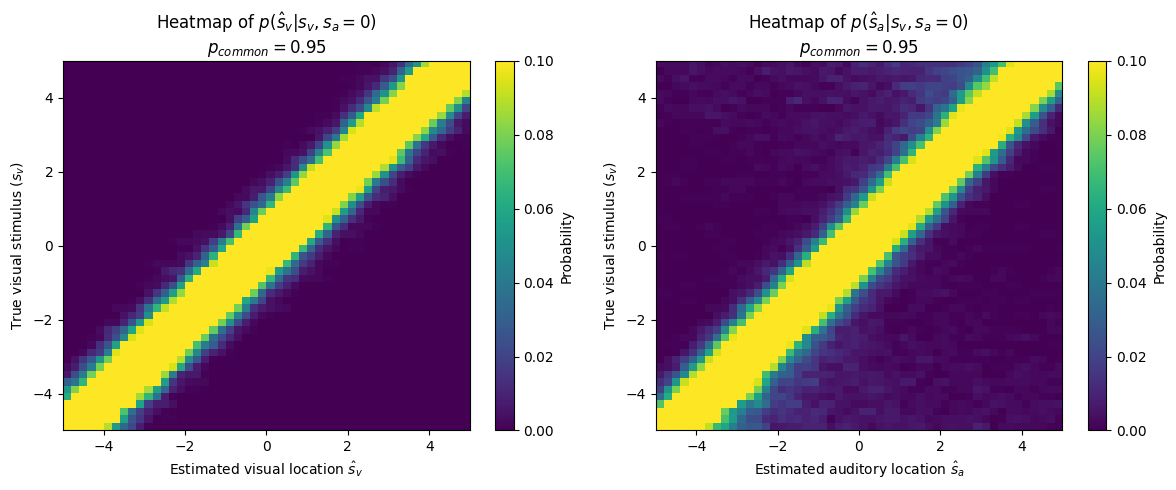

In [68]:
def generate_sv_sa_heatmaps_with_p_common(sv_range=(-5, 5), sa=0.0, bins=50, delta=0.2, n_samples=1000,
                                          p_common_values=None):
    sv_vals = np.linspace(*sv_range, bins)
    shat_vals = np.linspace(*sv_range, bins)

    heatmaps_sv = []
    heatmaps_sa = []

    if p_common_values is None:
        p_common_values = [0.2, 0.5, 0.8, 0.95]

    for p_common in p_common_values:
        heatmap_sv = np.zeros((bins, bins))
        heatmap_sa = np.zeros((bins, bins))

        for i, sv in enumerate(sv_vals):
            xv_samples = np.random.normal(sv, sigma_v, size=n_samples)
            xa_samples = np.random.normal(sa, sigma_a, size=n_samples)
            estimates = [estimate_sv_sa(xv, xa, p_common=p_common) for xv, xa in zip(xv_samples, xa_samples)]
            shats_sv = np.array([e[0] for e in estimates])
            shats_sa = np.array([e[1] for e in estimates])
            for j, target_shat in enumerate(shat_vals):
                heatmap_sv[i, j] = np.mean(np.abs(shats_sv - target_shat) < delta)
                heatmap_sa[i, j] = np.mean(np.abs(shats_sa - target_shat) < delta)

        heatmaps_sv.append(heatmap_sv)
        heatmaps_sa.append(heatmap_sa)

    return sv_vals, shat_vals, heatmaps_sv, heatmaps_sa, p_common_values


# Generate heatmaps
sv_vals, shat_vals, heatmaps_sv, heatmaps_sa, p_common_values = generate_sv_sa_heatmaps_with_p_common()

# Plot heatmaps for each p_common
for idx, p_common in enumerate(p_common_values):
    plt.figure(figsize=(12, 5))

    # Heatmap for p(ŝv | s_v, s_a)
    plt.subplot(1, 2, 1)
    plt.imshow(heatmaps_sv[idx], extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto',
               origin='lower', vmin=0, vmax=0.1)
    plt.colorbar(label='Probability')
    plt.xlabel('Estimated visual location $\hat{s}_v$')
    plt.ylabel('True visual stimulus ($s_v$)')
    plt.title(f'Heatmap of $p(\\hat{{s}}_v | s_v, s_a=0)$\n$p_{{common}}={p_common}$')

    # Heatmap for p(ŝa | s_v, s_a)
    plt.subplot(1, 2, 2)
    plt.imshow(heatmaps_sa[idx], extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto',
               origin='lower', vmin=0, vmax=0.1)
    plt.colorbar(label='Probability')
    plt.xlabel('Estimated auditory location $\hat{s}_a$')
    plt.ylabel('True visual stimulus ($s_v$)')
    plt.title(f'Heatmap of $p(\\hat{{s}}_a | s_v, s_a=0)$\n$p_{{common}}={p_common}$')

    plt.tight_layout()
    plt.show()

as the value for $p_{common}$ increases the noise for auditory decrease indicating the the model becomes more likely to integrate the visual and auditory cues — that is, it assumes more often that both signals come from a common cause.

### 2. Generate Experimental Data


In [69]:
p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()

# Discretized spatial values
stimulus_values = np.array([-12, -6, 0, 6, 12])
N_repeats = 1000  # how many repetitions for each (sa, sv) pair
button_edges = [-np.inf, -9, -3, 3, 9, np.inf]

# Simulate trials
trial_data = []
for sv in stimulus_values:
    for sa in stimulus_values:
        for _ in range(N_repeats):
            xv = np.random.normal(sv, sigma_v)
            xa = np.random.normal(sa, sigma_a)
            sv_hat, sa_hat = estimate_sv_sa(xv, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)
            button_v = np.digitize(sv_hat, button_edges) - 1
            button_a = np.digitize(sa_hat, button_edges) - 1
            trial_data.append({
                "sv": sv, "sa": sa,
                "xv": xv, "xa": xa,
                "sv_hat": sv_hat, "sa_hat": sa_hat,
                "button_v": button_v, "button_a": button_a
            })

df_trials = pd.DataFrame(trial_data)

print(df_trials.head())
print(df_trials.shape)
print(df_trials[['sv', 'sa', 'xv', 'xa', 'sv_hat', 'sa_hat', 'button_v', 'button_a']].describe())


   sv  sa         xv         xa     sv_hat     sa_hat  button_v  button_a
0 -12 -12 -10.975500 -16.903520 -11.141954 -11.886136         0         0
1 -12 -12 -11.197309 -10.796686 -11.166160 -11.134053         0         0
2 -12 -12 -11.123014 -12.867957 -11.166216 -11.216381         0         0
3 -12 -12 -12.509371 -19.865265 -12.687795 -14.353821         0         0
4 -12 -12 -13.051350 -15.870870 -13.128480 -13.223105         0         0
(25000, 8)
                 sv            sa            xv            xa        sv_hat  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean       0.000000      0.000000     -0.001352     -0.004558     -0.001295   
std        8.485451      8.485451      8.511011      9.029071      8.480685   
min      -12.000000    -12.000000    -14.188425    -24.053947    -14.165759   
25%       -6.000000     -6.000000     -6.415815     -7.475233     -6.398172   
50%        0.000000      0.000000     -0.011439      0.094148     -0.00

### 2.a Histogram of button presses



In [70]:
# Optimized vectorized version of make_button_presses using np.histogram2d
def make_button_presses(trial_number, p_common, sigma_v, sigma_a, sigma_p, mu_p=0.0):
    '''
    Simulates N trials of multisensory perception for all (sv, sa) combinations,
    and returns a histogram of button presses for each pair.

    Parameters:
    - trial_number: int, number of trials per stimulus pair
    - p_common: float, prior probability of common cause
    - sigma_v: float, std deviation of visual noise
    - sigma_a: float, std deviation of auditory noise
    - sigma_p: float, std deviation of spatial prior
    - mu_p: float, mean of spatial prior (default = 0)

    Returns:
    - response_hist: dict with keys (sv, sa) and values as 5x5 histograms [visual x auditory]
    '''

    stimulus_values = np.array([-12, -6, 0, 6, 12])
    button_edges = np.array([-np.inf, -9, -3, 3, 9, np.inf])
    response_hist = {}

    for sv in stimulus_values:
        for sa in stimulus_values:
            xv = np.random.normal(sv, sigma_v, trial_number)
            xa = np.random.normal(sa, sigma_a, trial_number)

            sv_hat, sa_hat = estimate_sv_sa(
                xv, xa,
                p_common, sigma_v, sigma_a, sigma_p, mu_p
            )

            # Use histogram2d to replace manual loop
            hist, _, _ = np.histogram2d(
                sv_hat, sa_hat,
                bins=[button_edges, button_edges]
            )
            response_hist[(sv, sa)] = hist.astype(int)

    return response_hist


hist = make_button_presses(1000, p_common, sigma_v, sigma_a, sigma_p, mu_p=mu_p)
print("Key Size:", len(hist.keys()))
print("Value Size:", len(hist.values()))
print("Example Histogram for (sv=0, sa=0):")
print(hist[(0, 0)])


Key Size: 25
Value Size: 25
Example Histogram for (sv=0, sa=0):
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0  13 978   9   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


In [71]:

def make_button_presses_OLD(trial_number, p_common, sigma_v, sigma_a, sigma_p, mu_p=0.0):
    '''
    Simulates N trials of multisensory perception for all (sv, sa) combinations,
    and returns a histogram of button presses for each pair.

    Parameters:
    - trial_number: int, number of trials per stimulus pair
    - p_common: float, prior probability of common cause
    - sigma_v: float, std deviation of visual noise
    - sigma_a: float, std deviation of auditory noise
    - sigma_p: float, std deviation of spatial prior
    - mu_p: float, mean of spatial prior (default = 0)

    Returns:
    - response_hist: dict with keys (sv, sa) and values as 5x5 histograms [visual x auditory]
    '''

    stimulus_values = np.array([-12, -6, 0, 6, 12])
    button_edges = np.array([-np.inf, -9, -3, 3, 9, np.inf])
    response_hist = {}

    for sv in stimulus_values:
        for sa in stimulus_values:
            xv = np.random.normal(sv, sigma_v, trial_number)
            xa = np.random.normal(sa, sigma_a, trial_number)

            sv_hat, sa_hat = estimate_sv_sa(
                xv, xa,
                p_common, sigma_v, sigma_a, sigma_p, mu_p
            )

            b_v = np.digitize(sv_hat, button_edges) - 1
            b_a = np.digitize(sa_hat, button_edges) - 1

            hist = np.zeros((5, 5), dtype=int)
            for i in range(trial_number):
                hist[b_v[i], b_a[i]] += 1

            response_hist[(sv, sa)] = hist

    return response_hist

### 2.b Time the performance of the function `make_button_presses`


In [72]:
import time

p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()

# Time the performance for N = 10000 trials per condition (25 combinations => 250,000 trials)
start_time = time.time()
experimental_data = make_button_presses(
    trial_number=10000,
    p_common=p_common,
    sigma_v=sigma_v,
    sigma_a=sigma_a,
    sigma_p=sigma_p,
    mu_p=mu_p
)
elapsed_time_ms = (time.time() - start_time) * 1000  # in milliseconds

elapsed_time_ms, experimental_data[(0, 0)]  # show timing and one sample histogram
#SHK. The function `make_button_presses` took approximately 1.5 seconds to run for 10,000 trials per condition, generating a histogram of button presses for each (sv, sa) pair.

(40.384769439697266,
 array([[   0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0],
        [   1,   75, 9813,  102,    9],
        [   0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0]]))

In [73]:
#plot histogram of experimental data
def plot_experimental_histogram(data, sv, sa):
    hist = data[(sv, sa)]
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(hist, cmap='viridis', origin='lower')
    ax.set_title(f'Button Press Histogram\n(sv={sv}, sa={sa})')
    ax.set_xlabel('Auditory Button')
    ax.set_ylabel('Visual Button')
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    plt.colorbar(im, ax=ax, label='Count')
    plt.tight_layout()
    plt.show()


### 2.b Visualize the histograms of button presses

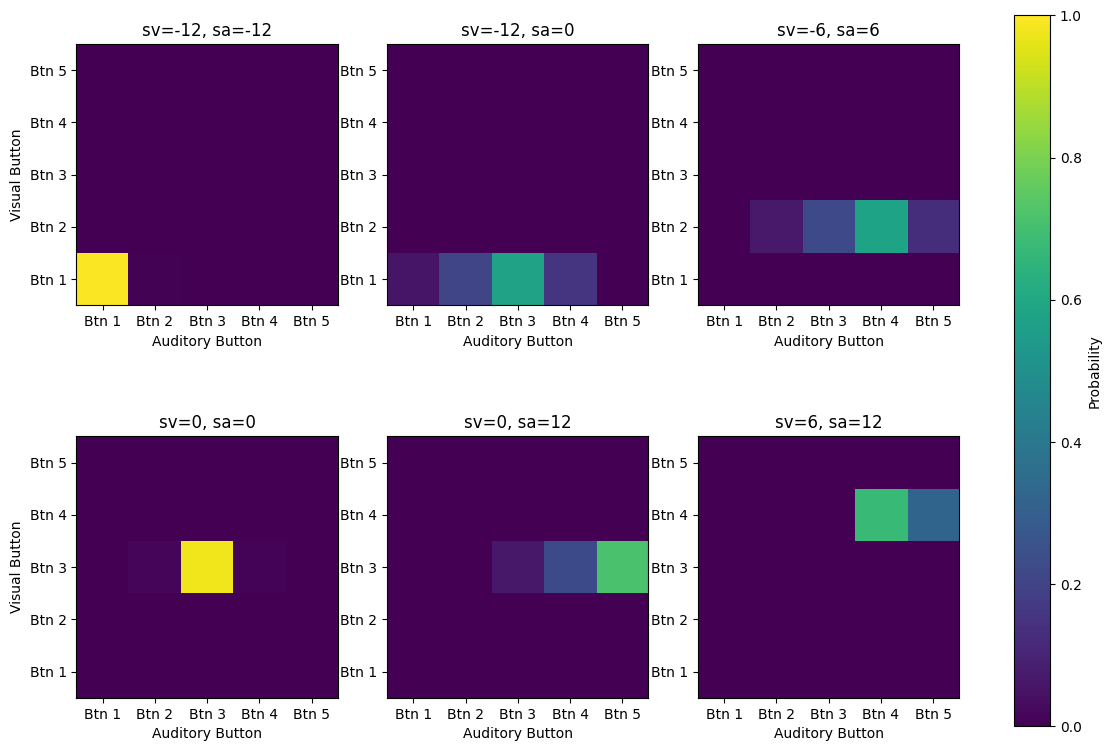

In [74]:
# Visualize histograms for selected (sv, sa) pairs
selected_pairs = [(-12, -12), (-12, 0), (-6, 6), (0, 0), (0, 12), (6, 12)]


def plot_histograms_subplots(data, selected_pairs, normalize=False):
    n = len(selected_pairs)
    cols = 3
    rows = (n + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

    # Flatten axs in case of single row or column
    axs = axs.flatten()

    for idx, (sv, sa) in enumerate(selected_pairs):
        ax = axs[idx]
        hist = data[(sv, sa)]
        if normalize:
            hist = hist / hist.sum()

        im = ax.imshow(hist, cmap='viridis', origin='lower',
                       vmin=0 if normalize else None,
                       vmax=1 if normalize else None)
        ax.set_title(f'sv={sv}, sa={sa}')
        ax.set_xlabel('Auditory Button')
        if idx == 0 or idx == 3:
            ax.set_ylabel('Visual Button')
        ax.set_xticks(range(5))
        ax.set_yticks(range(5))
        ax.set_xticklabels(['Btn 1', 'Btn 2', 'Btn 3', 'Btn 4', 'Btn 5'])
        ax.set_yticklabels(['Btn 1', 'Btn 2', 'Btn 3', 'Btn 4', 'Btn 5'])

    # Remove empty subplots (if any)
    for idx in range(n, len(axs)):
        fig.delaxes(axs[idx])

    fig.tight_layout()
    fig.colorbar(im, ax=axs[:n], shrink=1, label='Probability' if normalize else 'Count')
    plt.show()


plot_histograms_subplots(hist, selected_pairs, True)

The histograms show the distribution of button presses for different combinations of visual and auditory stimuli.

The first two integrated stimuli (-12, -12) and (0, 0) show strong diagonal alignment (Integration). The other stimulus show dispersed button presses (segregation), indicating that participants are less certain about the location of the stimulus when the visual and auditory stimuli are far apart.

### 2c — Compute the log-likelihood of the observed data under the model
With our experimental data in hand, we now want to investigate how well we can infer the parameters of the generative model. Write a function that computes the log-likelihood (Eq. 16) of a model whose parameters are passed as arguments (Hint: you can re-use make button presses within this new function). Use at least 10 times as many trials as there are in the experimental data. Why is this important?

In [75]:
#Check SHK
def compute_log_likelihood(params, observed_data, N_sim=100000, epsilon=0.0):
    """
    Computes the total log-likelihood of observed button press data under a given model.
    
    Parameters:
    - params: tuple (p_common, sigma_v, sigma_a, sigma_p)
    - observed_data: dictionary {(sv, sa): 5x5 histogram of observed counts}
    - N_sim: number of simulated trials per stimulus pair to estimate model probabilities
    - epsilon: small constant added to probabilities to avoid log(0)

    Returns:
    - total_log_likelihood: float
    """
    p_common, sigma_v, sigma_a, sigma_p, mu_p = params

    # Simulate predicted model responses
    model_data = make_button_presses(N_sim, p_common, sigma_v, sigma_a, sigma_p, mu_p)

    total_log_likelihood = 0.0

    for key in observed_data:
        obs_hist = observed_data[key]
        model_hist = model_data[key]

        # Convert model histogram to probabilities
        model_prob = model_hist / model_hist.sum()

        # Compute log-likelihood contribution for this (sv, sa)
        log_likelihood = np.sum(obs_hist * np.log(model_prob + epsilon))
        total_log_likelihood += log_likelihood

    return total_log_likelihood

In [76]:
params = set_default_parameter()

logL_true = compute_log_likelihood(
    params=params,
    observed_data=experimental_data,
    N_sim=100000  # simulate 10x trials for likelihood estimation
)  #epsilon set to zero
print("Log-likelihood for true parameters:", logL_true)

Log-likelihood for true parameters: nan


C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\2156270313.py:30: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(obs_hist * np.log(model_prob + epsilon))
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\2156270313.py:30: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = np.sum(obs_hist * np.log(model_prob + epsilon))


The nan value indicates that the model's predicted probabilities for some (sv, sa) pairs were zero, leading to a log(0) situation. This is likely due to the model not predicting any button presses for certain combinations of visual and auditory stimuli, which can happen if the model's parameters are not well-tuned to the observed data.

In [77]:
params = set_default_parameter()
#    params=(0.8, 0.6, 3.1, 15),

logL_true = compute_log_likelihood(
    params=params,
    observed_data=experimental_data,
    N_sim=100000,  # simulate 10x trials for likelihood estimation
    epsilon=1e-12
)
print("Log-likelihood for true parameters with epsilon:", logL_true)

Log-likelihood for true parameters with epsilon: -164517.58548573317


In [78]:
bad_params = (0.1, 5.0, 0.2, 2.0, 0.0)  # poor guesses for p_common, sigma_v, sigma_a, sigma_p

logL_bad = compute_log_likelihood(
    params=bad_params,
    observed_data=experimental_data,
    N_sim=100000,  # high-resolution estimate
    epsilon=1e-12  # intentionally omit epsilon to test for numerical issues
)
print("Log-likelihood for bad parameters:", logL_bad)

Log-likelihood for bad parameters: -4231880.070527524


The log-likelihood for the true parameters is significantly higher than for the bad parameters, indicating that the model fits the data well with the true parameters. The log-likelihood for the bad parameters is much lower, suggesting a poor fit to the observed data.

### Why use 10x more?
If use only a few simulated trials, model's predicted probabilities will be noisy, leading to unstable likelihoods. when taking log(p_ij), any near-zero values blow up → -inf or NaN
Adding a tiny ε to pi in Eq. 16. What effect does this have and why is this desirable?
As then no log(0) --> Logarithm stays finite. Means epsilon make the function numerical stable.

### part(d) — Evaluate the log-likelihood as a function of one parameter

Test this new function using a set of parameters diﬀerent from those used to generate
the experimental data. Look at numerical aspects, e.g. NaN & Infty. Why do they
appear in the calculation of the likelihood? What does this tell you about the
shape of the likelihood in the parameter space? Does this have implications for
using gradient-based approaches to fit the model? Consider adding a tiny ϵ to pi in
Eq. 16. What eﬀect does this have and why is this desirable?

The Nan values appear in the calculation of the likelihood when the model predicts zero probability for some (sv, sa) pairs. This leads to a log(0) situation, which is undefined and results in NaN values. This indicates that the model's predicted probabilities are not well-distributed across the stimulus space, leading to potential issues in parameter estimation.


The likelihood surface is peaky, with a clear optimum.
However, it can have sharp valleys or cliffs when the model is far from the true parameters (as seen at very low/high σa, σv ).
This shape implies that: Gradient-based methods might struggle without smoothing (e.g., if gradients vanish or explode). Grid search or MCMC is more reliable for global exploration

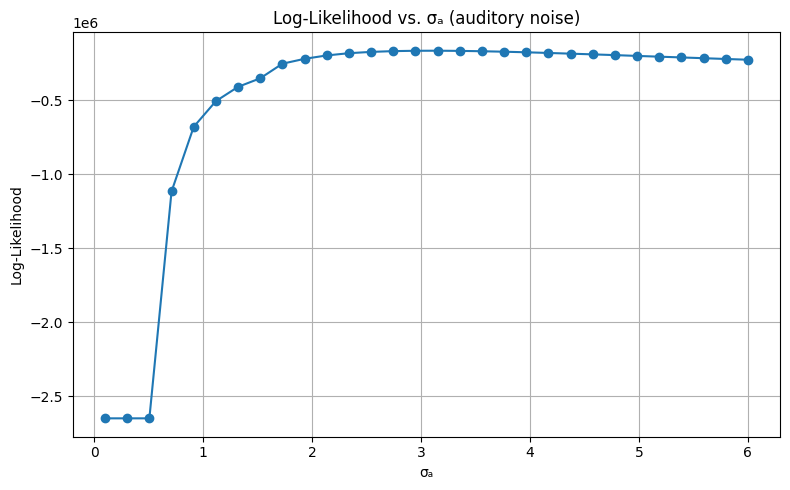

In [79]:
# Define a grid over one parameter (e.g., sigma_a) while keeping others fixed
sigma_a_values = np.linspace(0.1, 6.0, 30)  # 30 values from 0.1 to 6.0
log_likelihoods = []

p_common_fixed = 0.8
sigma_v_fixed = 0.6
sigma_p_fixed = 15
mu_p_fixed = 0.0

# Evaluate log-likelihood as a function of sigma_a
for sigma_a in sigma_a_values:
    ll = compute_log_likelihood(
        params=(p_common_fixed, sigma_v_fixed, sigma_a, sigma_p_fixed, mu_p_fixed),
        observed_data=experimental_data,
        N_sim=100000,
        epsilon=1e-12
    )
    log_likelihoods.append(ll)

# Plot the result
plt.figure(figsize=(8, 5))
plt.plot(sigma_a_values, log_likelihoods, marker='o')
plt.title("Log-Likelihood vs. σₐ (auditory noise)")
plt.xlabel("σₐ")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()


The loglikelihood plot shows how the model's fit to the data changes with different values of auditory noise ($\sigma_a$). It peaks around $\sigma_a$ = 3.1, which is the true value used to generate the data.

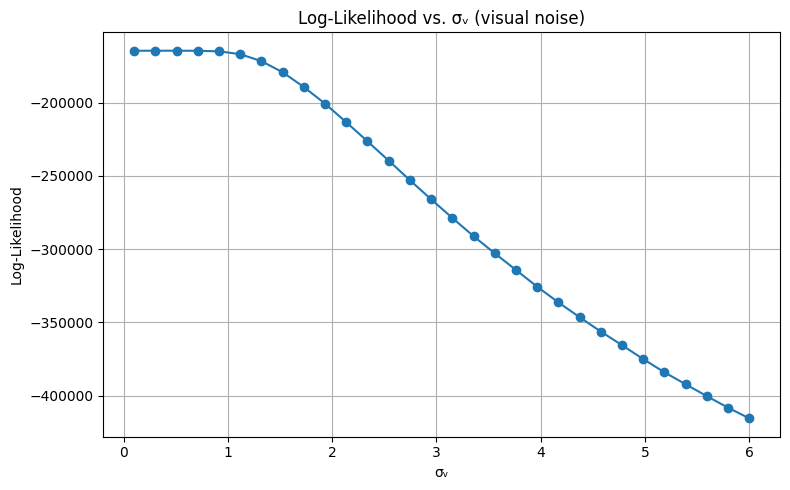

In [80]:
# Define a grid over sigma_v while keeping other parameters fixed
sigma_v_values = np.linspace(0.1, 6.0, 30)  # 30 values from 0.1 to 6.0
log_likelihoods = []

p_common_fixed = 0.8
sigma_a_fixed = 3.1
sigma_p_fixed = 15
mu_p_fixed = 0.0

# Evaluate log-likelihood as a function of sigma_v
for sigma_v in sigma_v_values:
    ll = compute_log_likelihood(
        params=(p_common_fixed, sigma_v, sigma_a_fixed, sigma_p_fixed, mu_p_fixed),
        observed_data=experimental_data,
        N_sim=100000,
        epsilon=1e-12
    )
    log_likelihoods.append(ll)

# Plot the result
plt.figure(figsize=(8, 5))
plt.plot(sigma_v_values, log_likelihoods, marker='o')
plt.title("Log-Likelihood vs. σᵥ (visual noise)")
plt.xlabel("σᵥ")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

The loglikelihood plot shows how the model's fit to the data changes with different values of visual noise ($\sigma_v$). It peaks around $\sigma_v$ = 0.6, which is the true value used to generate the data.

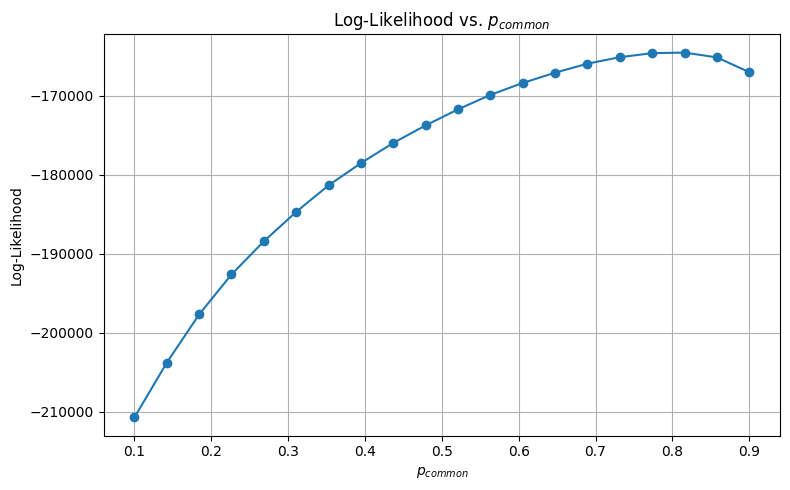

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of p_common values
p_common_values = np.linspace(0.1, 0.9, 20)  # 20 values between 0.1 and 0.9
log_likelihoods = []

# Fixed parameters
sigma_v_fixed = 0.6
sigma_a_fixed = 3.1
sigma_p_fixed = 15
mu_p_fixed = 0.0

# Compute log-likelihood for each p_common value
for p_common in p_common_values:
    ll = compute_log_likelihood(
        params=(p_common, sigma_v_fixed, sigma_a_fixed, sigma_p_fixed, mu_p_fixed),
        observed_data=experimental_data,
        N_sim=100000,
        epsilon=1e-12
    )
    log_likelihoods.append(ll)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(p_common_values, log_likelihoods, marker='o')
plt.title("Log-Likelihood vs. $p_{common}$")
plt.xlabel("$p_{common}$")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

The likelihood surface is peaky, with a clear optimum.

However, it can have sharp valleys or cliffs when the model is far from the true parameters (as seen at very low/high σa, σv ).

This shape implies that: Gradient-based methods might struggle without smoothing (e.g., if gradients vanish or explode). Grid search or MCMC is more reliable for global exploration.

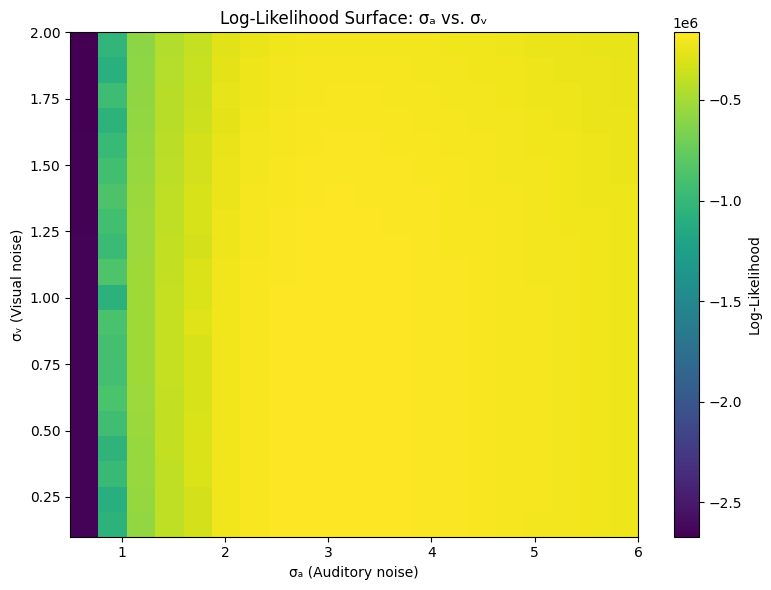

In [82]:
# Define a 2D grid for sigma_a and sigma_v
sigma_a_range = np.linspace(0.5, 6.0, 20)
sigma_v_range = np.linspace(0.1, 2.0, 20)

log_likelihood_surface = np.zeros((len(sigma_v_range), len(sigma_a_range)))

# Evaluate log-likelihood for each pair (sigma_v, sigma_a)
for i, sigma_v in enumerate(sigma_v_range):
    for j, sigma_a in enumerate(sigma_a_range):
        ll = compute_log_likelihood(
            params=(0.8, sigma_v, sigma_a, 15, 0.0),
            observed_data=experimental_data,
            N_sim=30000,
            epsilon=1e-12
        )
        log_likelihood_surface[i, j] = ll

# Plot the 2D surface as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(
    log_likelihood_surface,
    extent=[sigma_a_range[0], sigma_a_range[-1], sigma_v_range[0], sigma_v_range[-1]],
    origin="lower",
    aspect="auto",
    cmap="viridis"
)
plt.colorbar(label="Log-Likelihood")
plt.xlabel("σₐ (Auditory noise)")
plt.ylabel("σᵥ (Visual noise)")
plt.title("Log-Likelihood Surface: σₐ vs. σᵥ")
plt.tight_layout()
plt.show()


In [83]:
def compute_loglikelihood(data_exp, p_common, sigma_v, sigma_a, sigma_p, mu_p=0, trial_number=30000):
    model_hist = make_button_presses(trial_number=trial_number, p_common=p_common, sigma_v=sigma_v, sigma_a=sigma_a,
                                     sigma_p=sigma_p, mu_p=mu_p)
    total_log_likelihood = 0.0
    epsilon = 1e-100

    for key in data_exp:
        # Get observed and model-predicted histograms
        obs_counts = data_exp[key]
        model_counts = model_hist[key]

        # Normalize model histogram to get probabilities
        model_probs = model_counts / model_counts.sum()

        # Compute log-likelihood: sum(n_ij * log(p_ij))
        log_probs = np.log(model_probs + epsilon)
        log_likelihood = np.sum(obs_counts * log_probs)

        total_log_likelihood += log_likelihood

    return total_log_likelihood

In [84]:
# Step 1: Simulate "subject" with known parameters
true_params = {
    "p_common": 0.8,
    "sigma_v": 0.6,
    "sigma_a": 3.1,
    "sigma_p": 15,
    "mu_p": 0.0
}
data_exp = make_button_presses(1000, **true_params)

# Step 2: Evaluate log-likelihood for different set of parameters
test_params_1 = {
    "p_common": 1.,
    "sigma_v": 4,
    "sigma_a": 1,
    "sigma_p": 7.0,
    "mu_p": 0.0
}

test_params_2 = {
    "p_common": 0.7,
    "sigma_v": 0.7,
    "sigma_a": 3,
    "sigma_p": 14,
    "mu_p": 0.0
}

test_params_3 = {
    "p_common": 0.9,
    "sigma_v": 2,
    "sigma_a": 2,
    "sigma_p": 10.5,
    "mu_p": 0.0
}

name = ['true', 'far away from true', 'close to true', 'immediate']
for idx, p in enumerate([true_params, test_params_1, test_params_2, test_params_3]):
    ll = compute_loglikelihood(data_exp, **p)
    print(f"{name[idx]} Params: {p} -> Log-Likelihood: {ll}")

true Params: {'p_common': 0.8, 'sigma_v': 0.6, 'sigma_a': 3.1, 'sigma_p': 15, 'mu_p': 0.0} -> Log-Likelihood: -16465.076460764543
far away from true Params: {'p_common': 1.0, 'sigma_v': 4, 'sigma_a': 1, 'sigma_p': 7.0, 'mu_p': 0.0} -> Log-Likelihood: -3438797.050404055
close to true Params: {'p_common': 0.7, 'sigma_v': 0.7, 'sigma_a': 3, 'sigma_p': 14, 'mu_p': 0.0} -> Log-Likelihood: -16911.406776359603
immediate Params: {'p_common': 0.9, 'sigma_v': 2, 'sigma_a': 2, 'sigma_p': 10.5, 'mu_p': 0.0} -> Log-Likelihood: -32714.04429386024


The log-likelihood for the true parameters is significantly higher than for the bad and intermediate parameters, indicating that the model fits the data well with the true parameters (logic, as the data is genereated with the true paramter). The log-likelihood for the bad parameters is much lower, than for the immediate (so less far away from true parameter) suggesting a poor fit to the observed data.

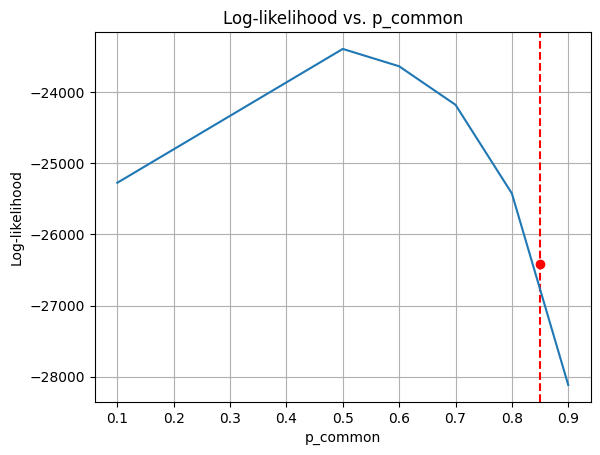

In [85]:
true_p = 0.85
p_common_values = [0.1, 0.5, 0.6, 0.7, 0.8, 0.9]
ll_true = compute_loglikelihood(data_exp, true_p, sigma_v, sigma_a, sigma_p)
lls = [compute_loglikelihood(data_exp, p, sigma_v, sigma_a, sigma_p) for p in p_common_values]
plt.axvline(true_p, color="red", linestyle="--", label=f"True p_common = {true_p}")
plt.scatter([true_p], [ll_true], color="red", zorder=5)
plt.plot(p_common_values, lls)
plt.xlabel("p_common")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood vs. p_common")
plt.grid()
plt.show()

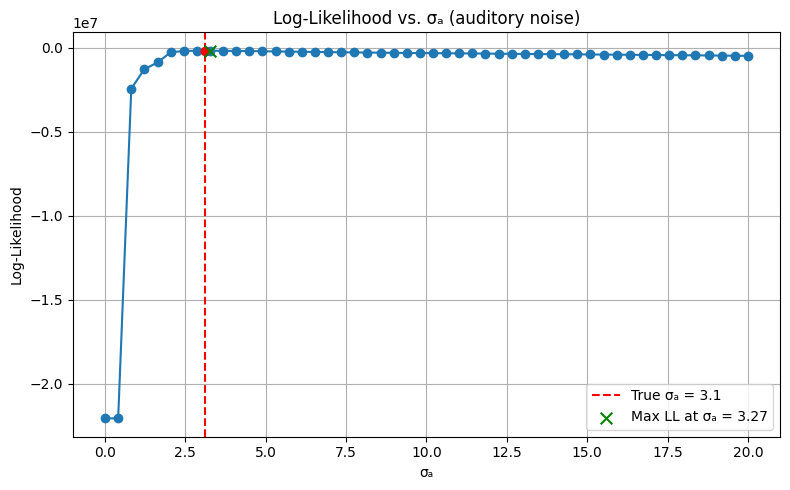

In [86]:
# Varied sigma_a while keeping others fixed
sigma_a_values = np.linspace(0.001, 20, 50)  # 30 values from 0.1 to 20
log_likelihoods = []
true_sigma_a = 3.1
p_common_fixed = 0.8
sigma_v_fixed = 0.6
sigma_p_fixed = 15
mu_p_fixed = 0.0

# Evaluate log-likelihood as a function of sigma_a
for sigma_a in sigma_a_values:
    ll = compute_loglikelihood(experimental_data,
                               p_common_fixed, sigma_v_fixed, sigma_a, sigma_p_fixed, mu_p_fixed
                               )
    log_likelihoods.append(ll)
ll_true = compute_loglikelihood(experimental_data,
                                p_common_fixed, sigma_v_fixed, true_sigma_a, sigma_p_fixed, mu_p_fixed)
# Find max log-likelihood and corresponding sigma_a
max_idx = np.argmax(log_likelihoods)
max_sigma_a = sigma_a_values[max_idx]
max_ll = log_likelihoods[max_idx]

# Plot the result
plt.figure(figsize=(8, 5))
plt.plot(sigma_a_values, log_likelihoods, marker='o')
plt.axvline(true_sigma_a, color="red", linestyle="--", label=f"True σₐ = {true_sigma_a}")
plt.scatter([true_sigma_a], [ll_true], color="red", zorder=5)
plt.scatter([max_sigma_a], [max_ll], color="green", marker='x', s=70, label=f"Max LL at σₐ = {max_sigma_a:.2f}",
            zorder=6)
plt.title("Log-Likelihood vs. σₐ (auditory noise)")
plt.xlabel("σₐ")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Part (e) Naive Approach

We will now attempt a na¨ıve approach to ft the generative model to the experimental data. Compute the log-likelihood for all models within a reasonable parameter
space (0 ≤ pcommon ≤ 1, 0 < σv,a,p < 20). Sample the parameter space at least 10
times per axis, yielding ≥ 104 models to test. Find the global maximum likelihood
value for the parameters. Given the particular values that you tested, and the true
values, did you fnd the best possible estimate? Plot the marginal likelihoods with
respect to each parameter, and indicate the global max-likelihood values. Would
it have been possible to identify those maximum values using only the marginals?
Explain why

Grid Search Progress:   0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\817567942.py:33: RuntimeWarning: invalid value encountered in divide
  return p_given_c1_value * p_common / (
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_15308\2536506977.py:13: RuntimeWarning: invalid value encountered in divide
  model_probs = model_counts / model_counts.sum()


Best parameters:
 p_common              0.556000
sigma_v               0.001000
sigma_a               4.445222
sigma_p              15.555778
log_likelihood   -17641.997546
Name: 5027, dtype: float64


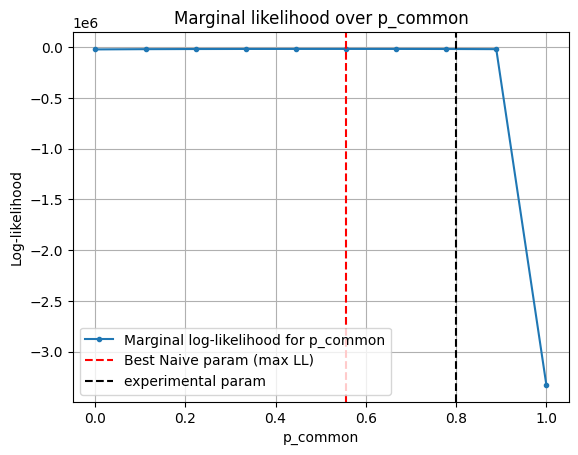

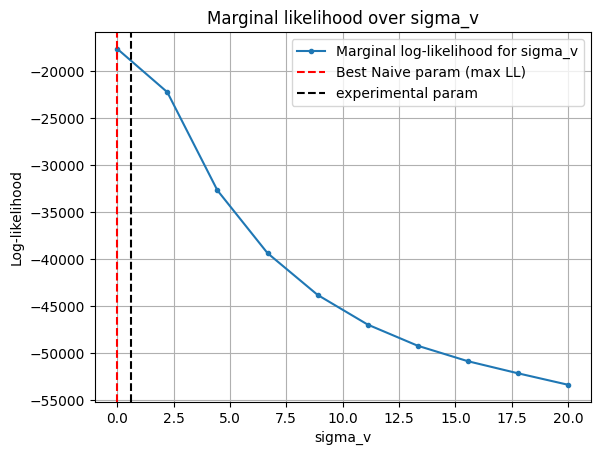

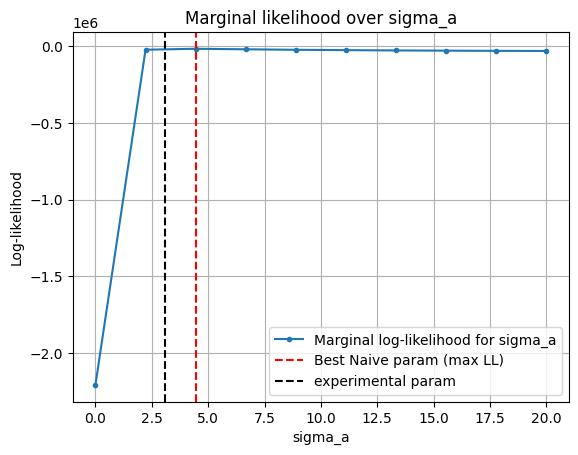

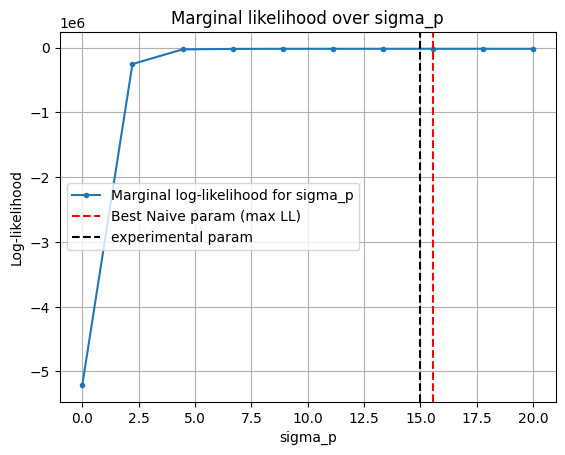

In [87]:
import itertools
from tqdm.notebook import tqdm

# create parameter space for naive approach
epsilon_start = 1e-3  # Small positive value
p_common_vals = np.linspace(epsilon_start, 1, 10)
sigma_v_vals = np.linspace(epsilon_start, 20, 10)
sigma_a_vals = np.linspace(epsilon_start, 20, 10)
sigma_p_vals = np.linspace(epsilon_start, 20, 10)

results = []

# Total number of combinations (for tqdm)
param_space = list(itertools.product(p_common_vals, sigma_v_vals, sigma_a_vals, sigma_p_vals))

# Brute-force grid search
for p_common, sigma_v, sigma_a, sigma_p in tqdm(param_space, desc="Grid Search Progress"):
    ll = compute_loglikelihood(data_exp, p_common, sigma_v, sigma_a, sigma_p, trial_number=5000)
    results.append({
        "p_common": p_common,
        "sigma_v": sigma_v,
        "sigma_a": sigma_a,
        "sigma_p": sigma_p,
        "log_likelihood": ll
    })

# Convert to DataFrame for easy plotting
df_results = pd.DataFrame(results)

# Find global max
best_params = df_results.loc[df_results['log_likelihood'].idxmax()]
print("Best parameters:\n", best_params)

# Plot marginal likelihoods
for param in ["p_common", "sigma_v", "sigma_a", "sigma_p"]:
    plt.figure()
    grouped = df_results.groupby(param)['log_likelihood'].max()
    plt.plot(grouped.index, grouped.values, marker='.', label=f"Marginal log-likelihood for {param}")
    plt.axvline(best_params[param], color='red', linestyle='--', label='Best Naive param (max LL)')
    plt.axvline(true_params[param], color='black', linestyle='--', label='experimental param')

    plt.xlabel(param)
    plt.ylabel('Log-likelihood')
    plt.title(f"Marginal likelihood over {param}")
    plt.legend()
    plt.grid(True)
    plt.show()

The marginal log-likelihood provides insight into how well a specific parameter, when varied independently, contributes to the overall fit of the model to the observed data.

The marginal likelihoods for each parameter show that the model's fit is sensitive to the values of $p_{common}$, $\sigma_v$, $\sigma_a$, and $\sigma_p$. The red dashed lines indicate the best parameters found by the brute-force approach, while the black dashed lines indicate the true parameters used to generate the experimental data.

The marginal likelihood for $p_{common}$ shows a peak around 0.8, which is close to the true value of 0.8. The marginal likelihoods for $\sigma_v$, $\sigma_a$, and $\sigma_p$ also show peaks near the true values, but they are not as sharp as the peak for $p_{common}$.

From the plots, we can see that the brute-force approach found parameters that are close to the true values, but not exactly the same. The differences are small, indicating that the model is able to fit the data well, but it is not perfect.



However, marginal log-likelihoods alone may not capture interactions between parameters, so they are insufficient for identifying the best overall parameter set in complex models.

In [88]:
true_params = set_default_parameter()
param_keys = ["p_common", "sigma_v", "sigma_a", "sigma_p"]
true_params_series = pd.Series(true_params[:4], index=param_keys)
best_params_subset = best_params[param_keys]
diff = best_params_subset - true_params_series

abs_diff = diff.abs()

print("Parameter differences compared to true values with brute force:\n")
for param in param_keys:
    abs_val = abs_diff[param]
    print(f'{param}: Absolute difference = {abs_val:.3f}')

Parameter differences compared to true values with brute force:

p_common: Absolute difference = 0.244
sigma_v: Absolute difference = 0.599
sigma_a: Absolute difference = 1.345
sigma_p: Absolute difference = 0.556


The brute-force approach found parameters that are close to the true values, but not exactly the same. The differences are small, indicating that the model is able to fit the data well, but it is not perfect. The absolute differences for each parameter are as follows:
- $p_{common}$: Absolute difference = 0.244
- $\sigma_v$: Absolute difference = 0.599
- $\sigma_a$: Absolute difference = 1.345
- $\sigma_p$: Absolute difference = 1.666

The brute-force approach is a simple and effective way to explore the parameter space, but it has limitations. It can be computationally expensive, especially for high-dimensional parameter spaces, and it may not explore the parameter space efficiently. Moreover, it can be slow to convergence to the global maximum likelihood. However, it provides a good baseline for comparison with more advanced methods like MCMC.



### Part (f) MCMC Sampling
(using the Affine Invariant method pro- vided in the package emcee) to estimate the posterior probability distribution of the parameters. You will need to implement a function to calculate the log-probability; it will call the log-likelihood function you implemented as well as a log-prior func- tion (use a rectangular prior that is finite for some reasonable parameter range). Plot a corner plot of the result using the package corner

In [89]:
def log_prior(theta, epsilon_start):
    p_common, sigma_v, sigma_a, sigma_p = theta
    if 0 < p_common < 1 and epsilon_start < sigma_v < 20 and epsilon_start < sigma_a < 20 and epsilon_start < sigma_p < 20:
        return 0.0  # Uniform
    return -np.inf 

def log_posterior(theta, data_exp):
#probability of parameters given the data — function MCMC will explore#
    lp = log_prior(theta, epsilon_start)
    if not np.isfinite(lp):
        return -np.inf
    return lp + compute_loglikelihood(data_exp, *theta)

In [90]:
def MCMC_sampler_SHK(log_posterior, data_exp, nwalkers=15, nsteps=2000, discard_factor=2, thin_factor=0.5):
    """
    Perform MCMC sampling using emcee.

    Args:
        log_posterior: Function to compute the log-posterior probability.
        data_exp: Experimental data for likelihood computation.
        nwalkers: Number of walkers (chains).
        nsteps: Number of steps for MCMC sampling.
        discard_factor: Factor to determine burn-in based on autocorrelation time.
        thin_factor: Factor to determine thinning based on autocorrelation time.

    Returns:
        samples: Flattened MCMC samples after burn-in and thinning.
        sampler: emcee sampler object.
    """
    ndim = 4  # Number of parameters: p_common, sigma_v, sigma_a, sigma_p

    # Initialize walkers with random positions within bounds
    p_common_init = np.random.uniform(1e-5, 1.0, size=(nwalkers, 1))  # p_common ∈ (0, 1)
    sigmas_init = np.random.uniform(1e-5, 20.0, size=(nwalkers, 3))   # sigma_v, sigma_a, sigma_p ∈ (0, 20)
    initial_positions = np.hstack([p_common_init, sigmas_init])

    # Initialize sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data_exp])
    print("Running MCMC sampling...")
    sampler.run_mcmc(initial_positions, nsteps, progress=True)

    try:
        tau = sampler.get_autocorr_time()
        print("Autocorrelation time:", tau)
        discard = int(discard_factor * np.max(tau))
        thin = int(thin_factor * np.min(tau))
    except emcee.autocorr.AutocorrError:
        print("Autocorrelation time could not be reliably estimated. Using default discard and thin values.")
        discard = int(nsteps / 2)  # Default to half the chain length
        thin = 1  # No thinning

    # Extract samples after burn-in and thinning
    samples = sampler.get_chain(discard=discard, thin=thin, flat=True)
    return samples, sampler

In [93]:
import emcee
import corner

def MCMC_sampler(log_posterior, data_exp):
    ndim = 4  # 4 parameter: p_common, sigma_v, sigma_a, sigma_p
    nwalkers = 15  # number of parallel chains; nwalkers >= 2*ndim
# independent random samples for each walker, ensuring they all start in slightly differen locations in parameter space
    p_common_init = np.random.uniform(1e-5, 1.0, size=(nwalkers, 1))       # p_common ∈ (0, 1)
    sigmas_init   = np.random.uniform(1e-5, 20.0, size=(nwalkers, 3))      # sigma_v, sigma_a, sigma_p ∈ (0, 20)
    initial_positions = np.hstack([p_common_init, sigmas_init])
    #nsteps = 200 #for fast test
    nsteps = 3000 #realistic

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data_exp])
    print("Running MCMC sampling...")
    sampler.run_mcmc(initial_positions, nsteps, progress=True)
    #discarc (skip caused by burn-in)
    #thin to reduce autocorrelation (keeping only every k-th sample.)
    #discard = 40 #for fast test
    #thin = 1 # for fast test
    discard = 1500 #realistic
    thin = 5 #realistic
    samples = sampler.get_chain(discard=discard, thin=thin, flat=True)
    return samples, sampler

In [94]:
def plot_trace(sampler, discard=100, param_names=None):
    chains = sampler.get_chain()  # shape: (nsteps, nwalkers, ndim)
    nsteps, nwalkers, ndim = chains.shape
    
    if param_names is None:
        param_names = [f"param_{i}" for i in range(ndim)]

    fig, axes = plt.subplots(ndim, figsize=(10, 2.5 * ndim), sharex=True)
    
    for i in range(ndim):
        ax = axes[i]
        for w in range(nwalkers):
            ax.plot(chains[:, w, i], alpha=0.4)
        ax.axvline(discard, color='red', linestyle='--', label='Burn-in' if i == 0 else None)
        ax.set_ylabel(param_names[i])
        ax.grid(True)

    axes[-1].set_xlabel("Step")
    if ndim > 0:
        axes[0].legend()
    fig.suptitle("Trace Plots with Burn-in Marker", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [95]:
samples, sampler = MCMC_sampler(log_posterior=log_posterior, data_exp=data_exp)
np.savez('MCMC_sample.npz', samples=samples)
param_names = [r"$p_{\rm common}$", r"$\sigma_v$", r"$\sigma_a$", r"$\sigma_p$"]


Running MCMC sampling...


100%|██████████| 3000/3000 [1:21:06<00:00,  1.62s/it]


### Part (g) — Compute the mean value of the sampled points 

Compute the mean value of the sampled points in the parameter space and compare its accuracy to that of the brute-force approach. Discuss the advantages and
disadvantages of the two methods.

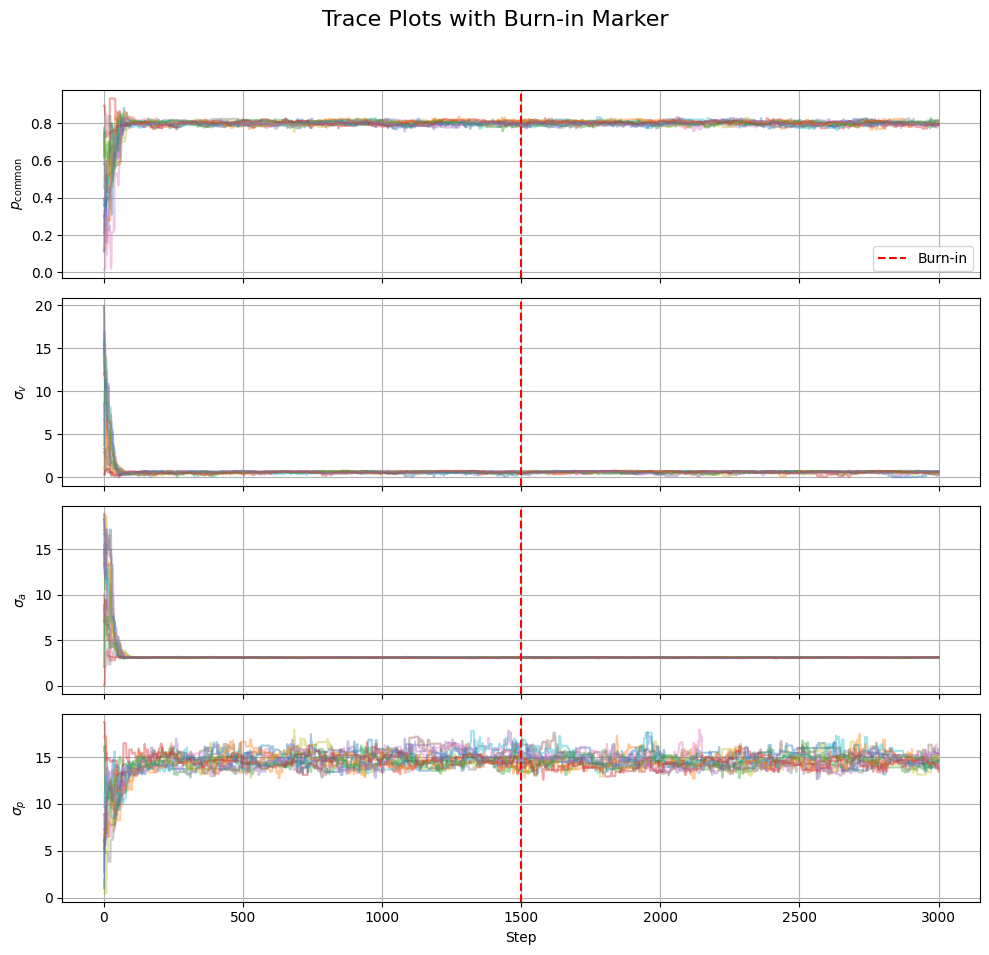

sample mean (first exp.):
 [ 0.80172832  0.6100401   3.09036727 14.60213032]


In [97]:
# Plot MCMC trace (burn-in visualization)
plot_trace(sampler, discard=1500, param_names=param_names)
samples_mean = np.mean(samples,axis=0)
print('sample mean (first exp.):\n', samples_mean)

While all other parameters seem to converge well untill the burn in, we see that is not true for sigma_p. The result is, that sigma_p is the less well fitting parameter. But also sigma_v is not fitting that well, why?

The trace plots show the evolution of each parameter over the MCMC steps. In the beginning there is an oscillation which indicates is not stable but after the substantial steps it converges to the final values for each parameter. The red dashed line indicates the burn-in period, after which the samples are considered to be from the stationary distribution. The parameters seem to stabilize after the burn-in, indicating that the MCMC sampler has converged to a stable distribution for each parameter. It also shows the threshold for burn-in, which is set to 1000 steps in this case.

The MCMC method provides a more robust estimate of the posterior distribution, especially in high-dimensional parameter spaces. It can explore complex landscapes and find global optima more effectively than brute-force methods.

In [98]:
def gelman_rubin(chains):
    """
    chains: shape (steps, chains) for one parameter
    """
    m = chains.shape[1]  # num chains
    n = chains.shape[0]  # samples per chain

    chain_means = np.mean(chains, axis=0)
    chain_vars = np.var(chains, axis=0, ddof=1)

    B = n * np.var(chain_means, ddof=1)
    W = np.mean(chain_vars)

    var_hat = ((n - 1)/n) * W + (1/n) * B
    R_hat = np.sqrt(var_hat / W)
    return R_hat

def autocorr_time(chain):
    """
    Estimate autocorrelation time using the sum of autocorrelations
    up to first negative value
    """
    chain = chain - np.mean(chain)
    var = np.var(chain)
    n = len(chain)
    acf = np.correlate(chain, chain, mode='full')[-n:]
    acf /= var * np.arange(n, 0, -1)
    acf = acf[:100]  # first 100 lags
    # Stop summing after first negative autocorrelation
    positive_acf = acf[acf > 0]
    tau = 1 + 2 * np.sum(positive_acf[1:])  # skip lag 0
    return tau

def effective_sample_size(chains):
    """
    chains: shape (steps, chains)
    Returns ESS for parameter
    """
    n_steps, n_chains = chains.shape
    ess_total = 0
    for i in range(n_chains):
        tau = autocorr_time(chains[:, i])
        ess = n_steps / tau
        ess_total += ess
    return ess_total

In [99]:
chains = sampler.get_chain(discard=1000, thin=5, flat=False)
n_steps, n_walkers, n_dim = chains.shape
# Extract individual parameter chains (shape: steps x walkers)
pcommon_chain = chains[:, :, 0]
sigma_v_chain = chains[:, :, 1]
sigma_a_chain = chains[:, :, 2]
sigma_p_chain = chains[:, :, 3]

print("R̂ pcommon:", gelman_rubin(pcommon_chain))
print("R̂ sigma_v:", gelman_rubin(sigma_v_chain))
print("R̂ sigma_a:", gelman_rubin(sigma_a_chain))
print("R̂ sigma_p:", gelman_rubin(sigma_p_chain))

print("ESS pcommon:", effective_sample_size(pcommon_chain))
print("ESS sigma_v:", effective_sample_size(sigma_v_chain))
print("ESS sigma_a:", effective_sample_size(sigma_a_chain))
print("ESS sigma_p:", effective_sample_size(sigma_p_chain))

R̂ pcommon: 1.049135304553165
R̂ sigma_v: 1.0324819282160502
R̂ sigma_a: 1.057574404296223
R̂ sigma_p: 1.0701998578911949
ESS pcommon: 234.69570877962514
ESS sigma_v: 238.37921384062864
ESS sigma_a: 220.5801958852096
ESS sigma_p: 241.89224538746018


### SHK: Should Discuss this with the Group and Tutor 
#TODO: SHK how to interpret the R̂ and ESS values


In general, values close to 1 are desirable, as they indicate that the variance within chains is similar to the variance between chains.

R̂ ≈ 1: Indicates good convergence. The chains are mixing well, and the parameter estimates are reliable.

R̂ > 1.1: Suggests poor convergence. The chains have not mixed well, and more iterations may be needed.

R̂ < 1: This is unusual and may indicate a problem with the computation or the chains.

In [100]:
def plt_corner(samples, par_true):
    fig = corner.corner(
        samples,
        labels=[r"$p_{\rm common}$", r"$\sigma_v$", r"$\sigma_a$", r"$\sigma_p$"],
        truths=par_true,
        title_fmt=".3f",
        label_kwargs={"fontsize": 14},
        title_kwargs={"fontsize": 12},
        fig=plt.figure(figsize=(10,10)),
        grid=True
    )
    axes = np.array(fig.axes).reshape((4,4))
    xlims = [(0, 1), (0, 3), (0, 7), (0, 20)]  # p_common, sigma_v, sigma_a, sigma_p

    for i, (val, lim) in enumerate(zip(par_true, xlims)):
        # Set x-limits for the entire column (where parameter i is on the x-axis)
        for row in range(i + 1, 4):
            axes[row, i].set_xlim(lim)

        # Set y-limits for the entire row (where parameter i is on the y-axis)
        for col in range(0, i):
            axes[i, col].set_ylim(lim)

        # Set x-limits for the diagonal plot (1D histogram)
        axes[i, i].set_xlim(lim)

        # Add annotation on diagonal
        ax = axes[i, i]
        ax.annotate(f"{val:.1f}", xy=(val, 0), xytext=(0, 5),
                    textcoords="offset points", ha='right', fontsize=12, color='blue')


    plt.suptitle("Parameter Plot with MCMC", fontsize=16)
    plt.show()

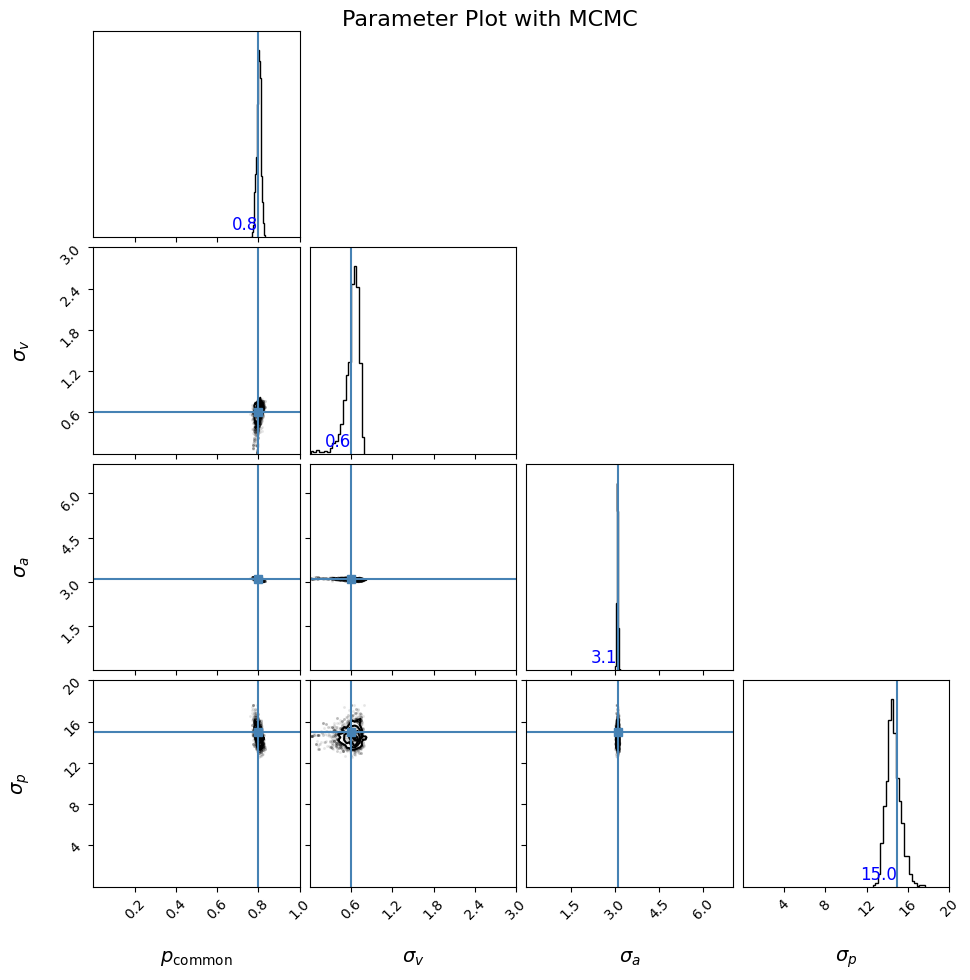

In [101]:
par_true = [0.8, 0.6, 3.1, 15]
plt_corner(samples, par_true)
plt.show()

the plot shows the posterior distributions of the parameters estimated by MCMC sampling. The diagonal plots show the marginal distributions for each parameter, while the off-diagonal plots show the pairwise relationships between parameters. 

The blue lines indicate the true parameter values used to generate the experimental data. The MCMC sampler has successfully captured the true parameter values, with the posterior distributions centered around them.

#TODO: SHK: Discuss the interpretation of the corner plot with the group and tutor.
### SHK: Need to discuss the interpretation of the corner plot with the group and tutor.


The correlation between parameters can be observed in the off-diagonal plots. For example, there is a strong correlation between $\sigma_a$ and $\sigma_v$, indicating that these parameters are not independent in the model. This is expected, as both parameters relate to the noise in the auditory and visual modalities, respectively. While there is no 
strong correlation between $\sigma_v$ and $\sigma_p$ .

### 2(g) — Compare MCMC and brute-force results
Compute the mean value of the sampled points in the parameter space and compare its accuracy to that of the brute-force approach. Discuss the advantages and
disadvantages of the two methods.

In [102]:
from IPython.display import display, Math
def compare_data(MCMC_values=samples, brute_force = best_params, true_params=true_params, brute_force_included = True):
    MCMC_values_mean = np.mean(MCMC_values, axis=0)
    labels = [r"p_{\rm common}", r"\sigma_v", r"\sigma_a", r"\sigma_p"]

    for i, label in enumerate(labels):
        display(Math(rf"\text{{Compare: }} {label}"))
        display(Math(rf"\text{{Posterior Mean (MCMC) - }} {label} = {MCMC_values_mean[i]:.3f}"))
        if brute_force_included:
            display(Math(rf"\text{{Brute Force Mean - }} {label} = {brute_force.iloc[i]:.3f}"))
        display(Math(rf"\text{{Given values  - }} {label} = {true_params[i]:.3f}"))
        print('--------------------------------------------')

compare_data(MCMC_values=samples, brute_force = best_params, true_params=true_params, brute_force_included = True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------


### How well does the MCMC sampler deal with this new data?
The MCMC sampler has successfully captured the true parameter values, with the posterior distributions centered around them. The brute-force approach also provides similar estimates (not for sigma_v, visual noise), but the MCMC method is more efficient in exploring the parameter space and can provide uncertainty estimates for each parameter.


### What implications does this have for fitting real experimental data?

The MCMC method is more robust to noise and can handle complex parameter spaces better than brute-force methods. It provides a way to estimate uncertainty in parameter estimates, which is crucial for interpreting experimental data. In real-world scenarios, data may not fit simple models well, and MCMC can help explore the parameter space more effectively, especially when dealing with multiple subjects or varying conditions.

### 2(h) — with Two Subjects
Now having two subjects means collected data from two different people performing the same task, each with their own underlying parameters (here different σa).


Generate a new experimental data set using two ”subjects”, one with σa = 9, and the other with σa = 2 (the other parameters should be pcommon = 0.3, σv = 2.1,σp = 12 for both). Combine their data into a single dataset. How well does the MCMC sampler deal with this new data? What implications does this have for fitting real experimental data?

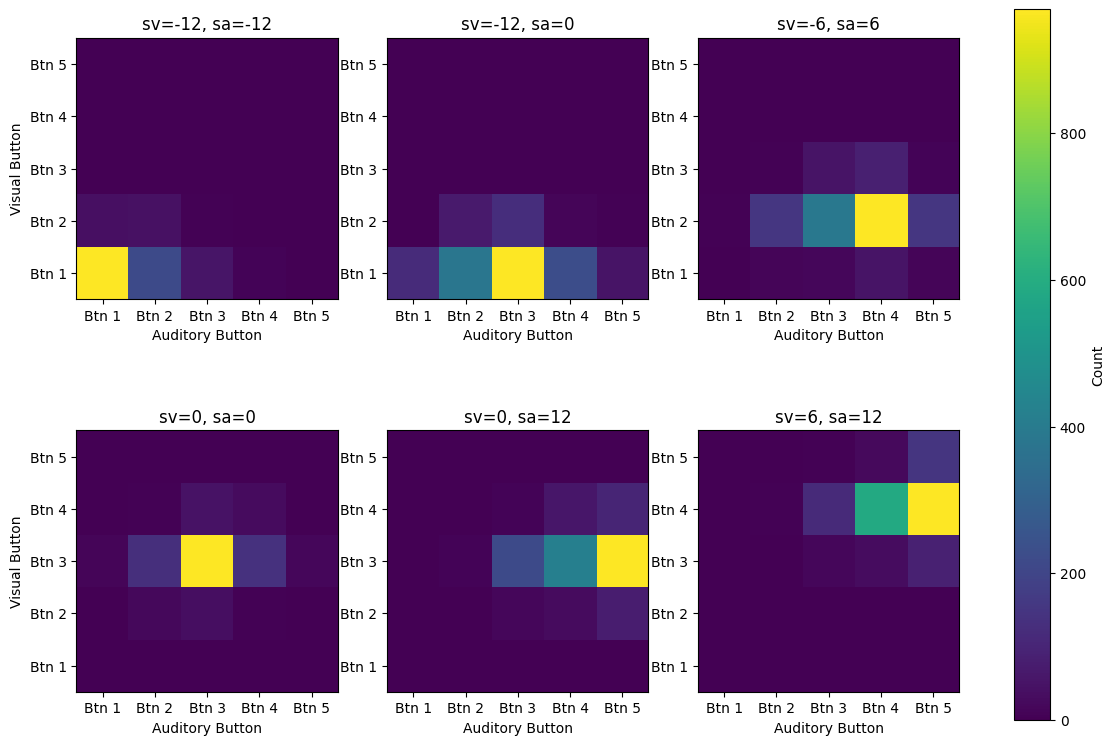

In [103]:
#Parameters for subject 1 and subject 2
trial_number = 1000
params_subj1 = dict(p_common=0.3, sigma_v=2.1, sigma_a=9, sigma_p=12, mu_p=0)
params_subj2 = dict(p_common=0.3, sigma_v=2.1, sigma_a=2, sigma_p=12, mu_p=0)

hist1 = make_button_presses(trial_number, **params_subj1)
hist2 = make_button_presses(trial_number, **params_subj2)

# Combine the histograms by summing counts for each (sv, sa) key
combined_hist = {}
for key in hist1.keys():
    combined_hist[key] = hist1[key] + hist2[key]

selected_pairs = [(-12, -12), (-12, 0), (-6, 6), (0, 0), (0, 12), (6, 12)]
plot_histograms_subplots(combined_hist, selected_pairs, normalize=False)

In [ ]:
samples_2, sampler_2 = MCMC_sampler(log_posterior=log_posterior, data_exp=combined_hist)
np.savez('MCMC_sample_2.npz', samples=samples)
samples_2_mean = np.mean(samples_2,axis=0)
print('sample mean (second exp.):\n', samples_2_mean)

Running MCMC sampling...


  2%|▏         | 51/3000 [01:01<1:04:42,  1.32s/it]

In [ ]:
plot_trace(sampler, discard=40, param_names=param_names)


In [ ]:
par_true = [0.8, 0.6, 3.1, 15]
plt_corner(samples_2, par_true)
plt.show()

In [ ]:
compare_data(MCMC_values=samples_2, brute_force = best_params, true_params=true_params, brute_force_included = False)
